In [ ]:
!pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torchvision.models import resnet50
import numpy as np

In [ ]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = dsets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

Files already downloaded and verified


In [ ]:


# Define the model
model = resnet50().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Training loop with l1-norm calculation
# num_epochs = 10
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         images = images.to(device)
#         labels = labels.to(device)

#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, labels)

#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     # Calculate the l1-norms after each epoch
#     l1_norms = {}
#     for name, param in model.named_parameters():
#         if 'weight' in name:  # We're only interested in the weights
#             l1_norm = torch.norm(param, 1).item()
#             l1_norms[name] = l1_norm

#     print(f"Epoch {epoch+1} l1-norms: {l1_norms}")


In [ ]:
import matplotlib.pyplot as plt

# Define a dictionary to store the l1-norms of each layer for each epoch
l1_norms_history = {}

num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate the l1-norms after each epoch
    l1_norms = {}
    for name, param in model.named_parameters():
        if 'weight' in name:  # We're only interested in the weights
            l1_norm = torch.norm(param, 1).item()
            l1_norms[name] = l1_norm

    # Store the l1-norms for this epoch
    l1_norms_history[epoch] = l1_norms

    print(f"Epoch {epoch+1} l1-norms: {l1_norms}")

Epoch 1 l1-norms: {'conv1.weight': 199.38790893554688, 'bn1.weight': 63.97035217285156, 'layer1.0.conv1.weight': 579.8416748046875, 'layer1.0.bn1.weight': 64.01531982421875, 'layer1.0.conv2.weight': 1753.746826171875, 'layer1.0.bn2.weight': 64.01119995117188, 'layer1.0.conv3.weight': 1158.1478271484375, 'layer1.0.bn3.weight': 255.9188232421875, 'layer1.0.downsample.0.weight': 1166.37890625, 'layer1.0.downsample.1.weight': 256.80999755859375, 'layer1.1.conv1.weight': 2310.5234375, 'layer1.1.bn1.weight': 63.98175048828125, 'layer1.1.conv2.weight': 1749.964111328125, 'layer1.1.bn2.weight': 64.0003662109375, 'layer1.1.conv3.weight': 1162.40185546875, 'layer1.1.bn3.weight': 255.46949768066406, 'layer1.2.conv1.weight': 2328.85302734375, 'layer1.2.bn1.weight': 64.03923034667969, 'layer1.2.conv2.weight': 1763.08154296875, 'layer1.2.bn2.weight': 64.04572296142578, 'layer1.2.conv3.weight': 1158.426025390625, 'layer1.2.bn3.weight': 255.128173828125, 'layer2.0.conv1.weight': 3271.20556640625, 'lay

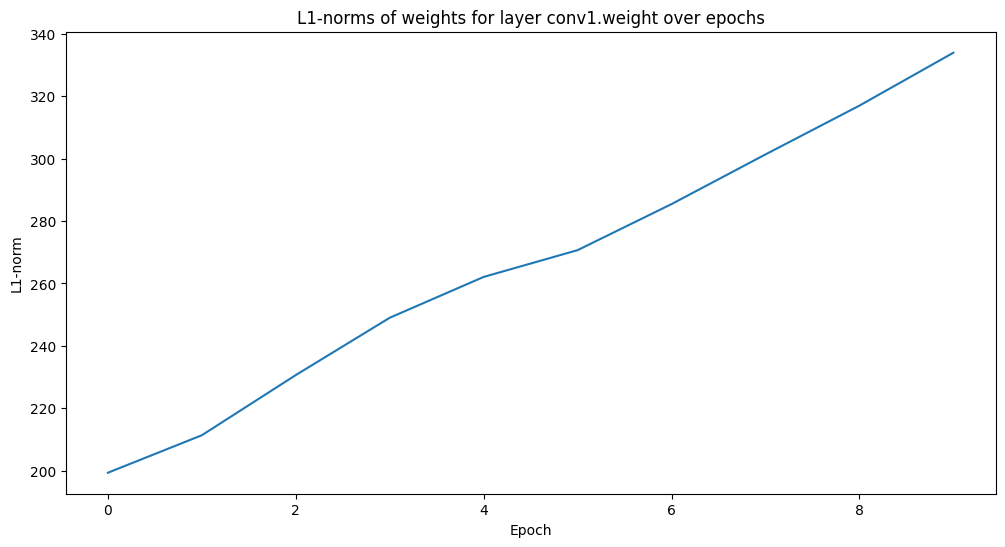

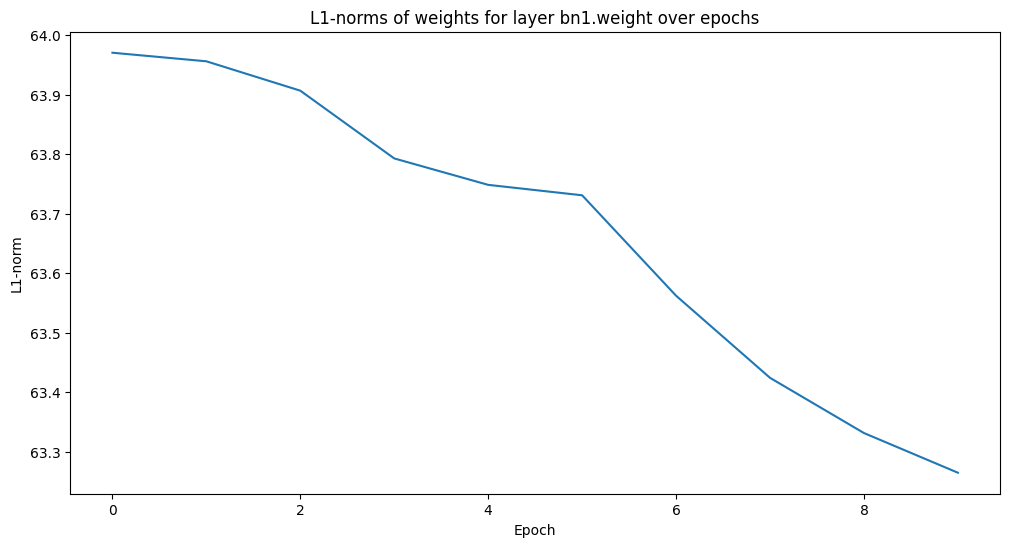

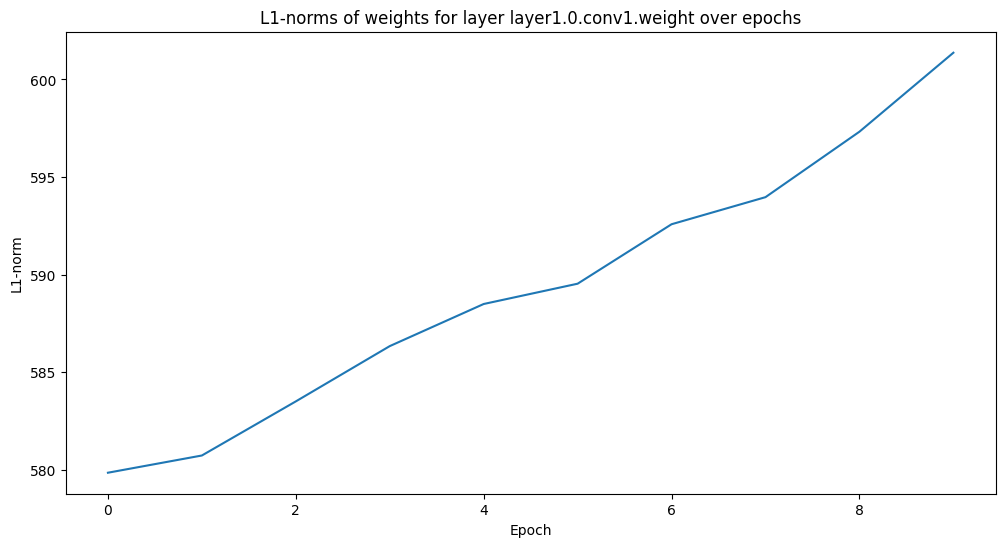

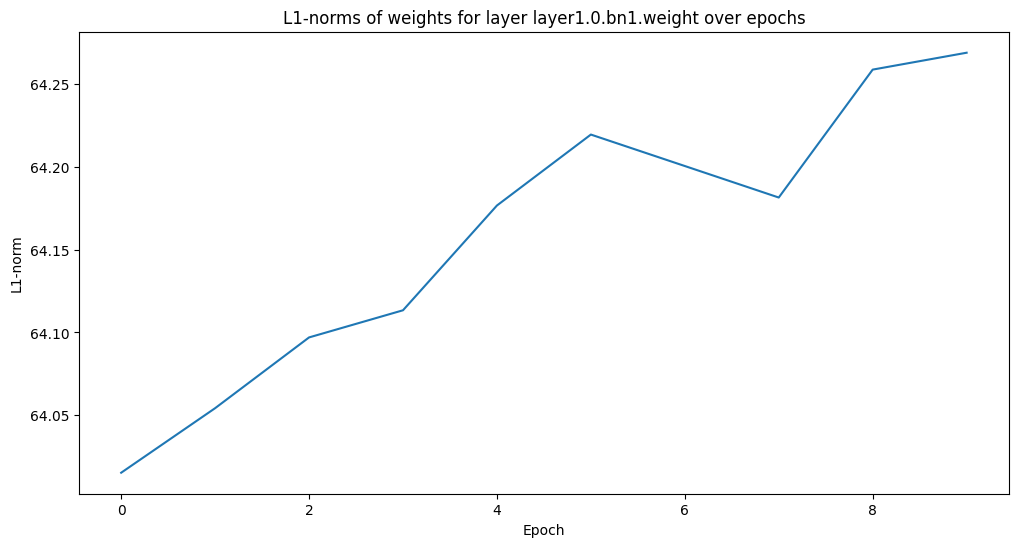

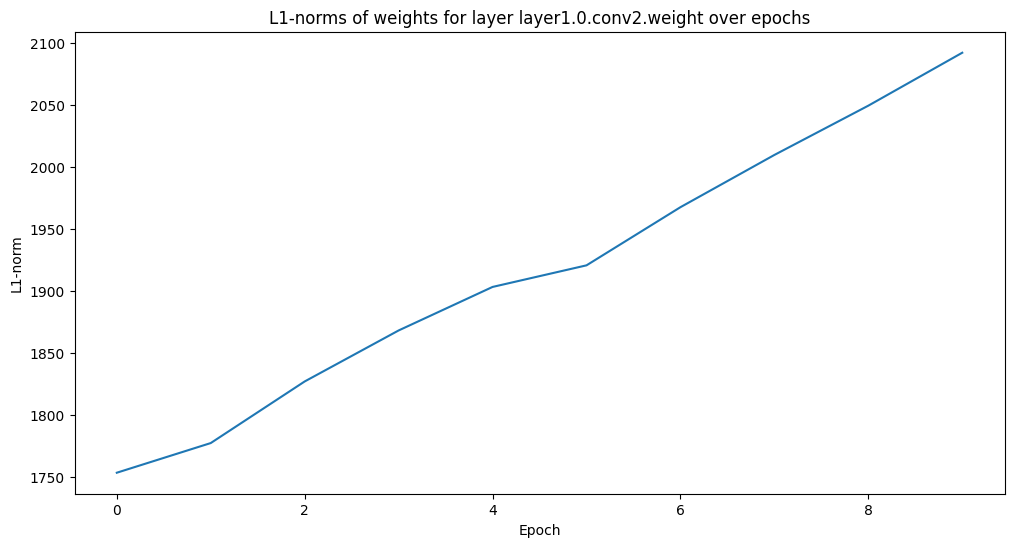

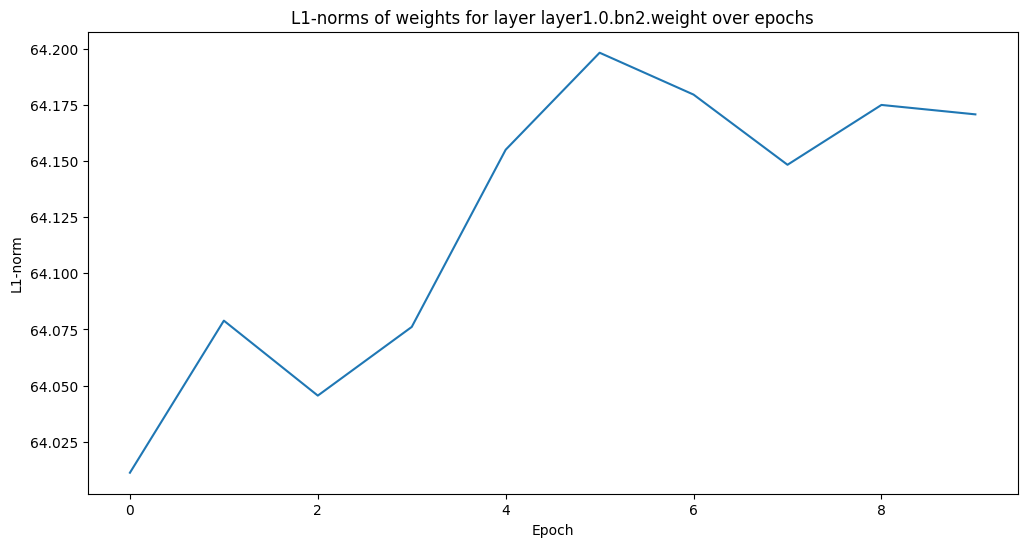

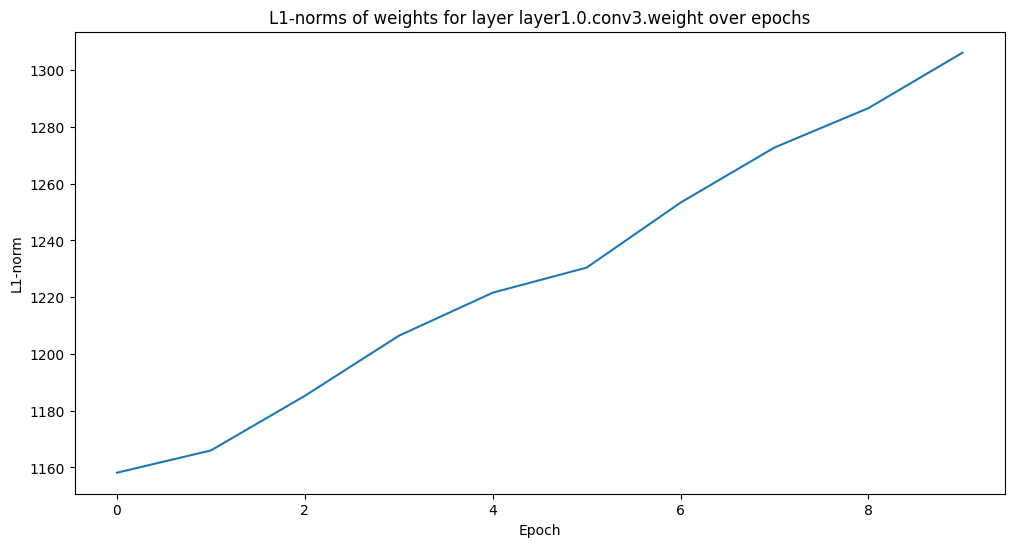

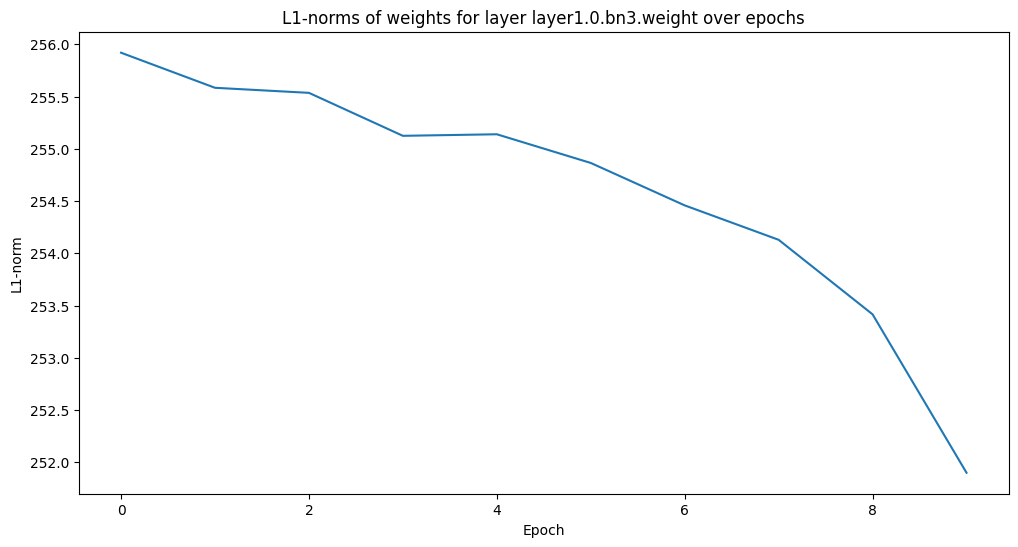

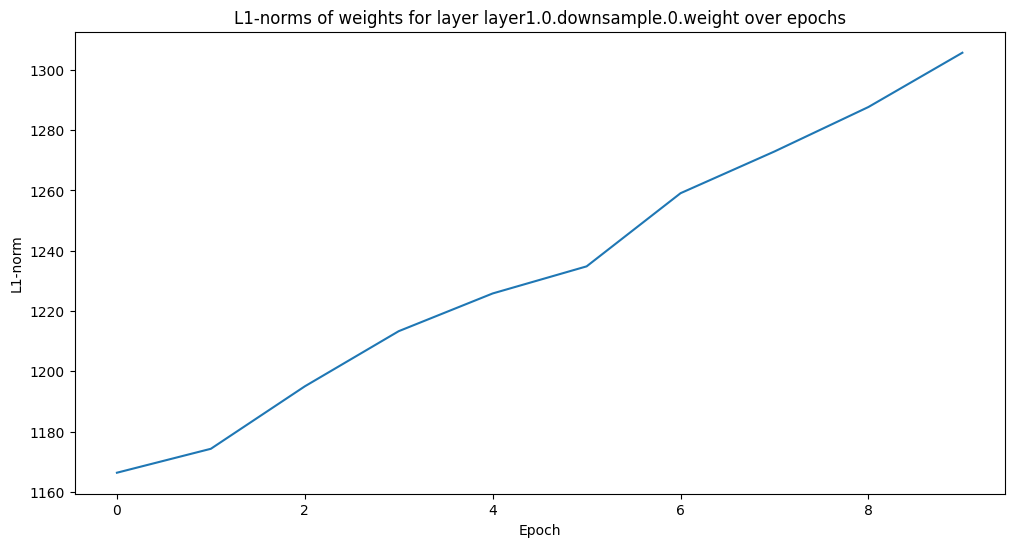

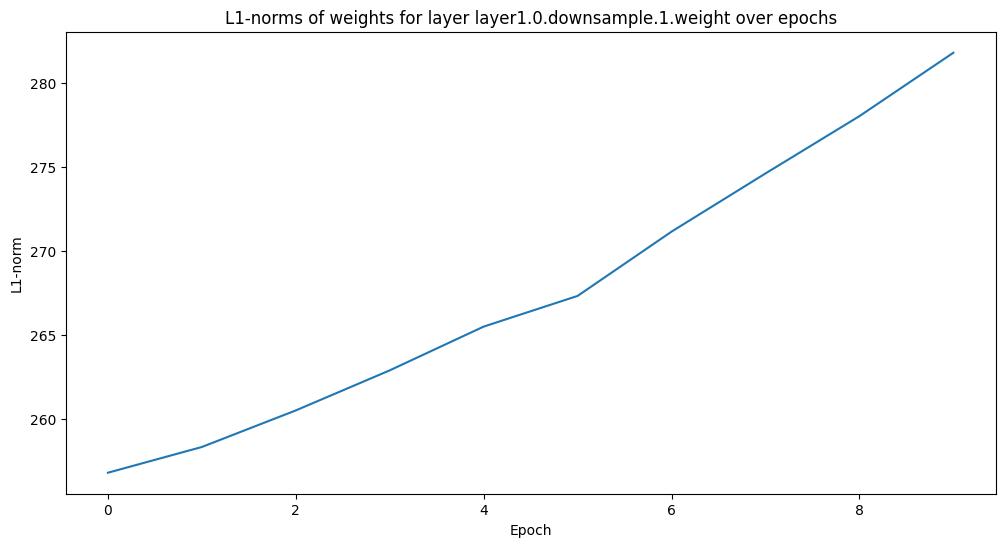

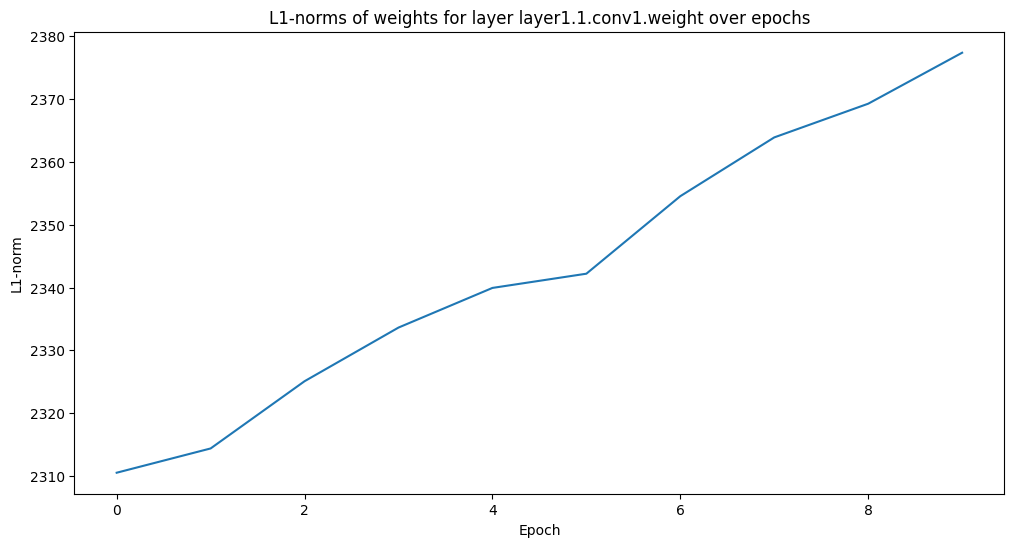

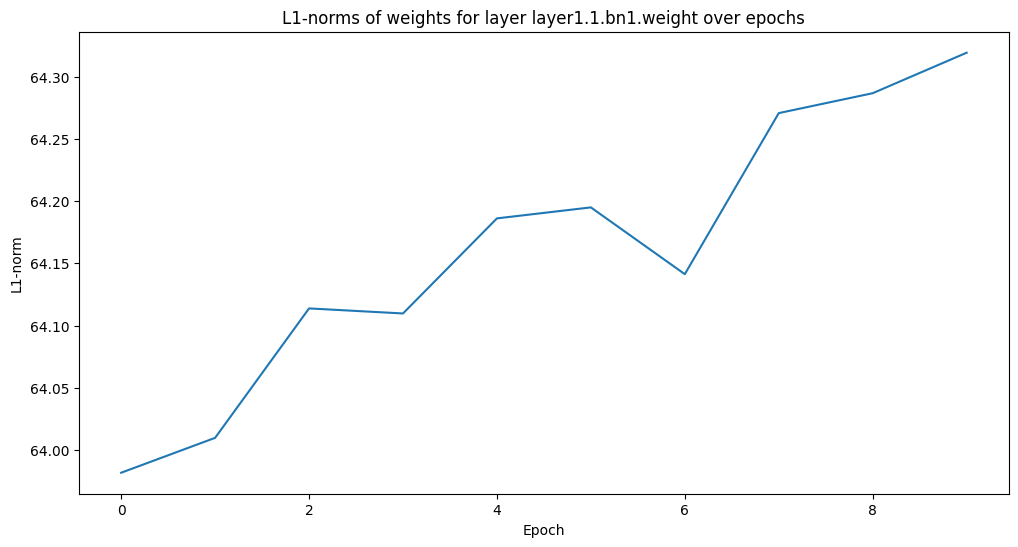

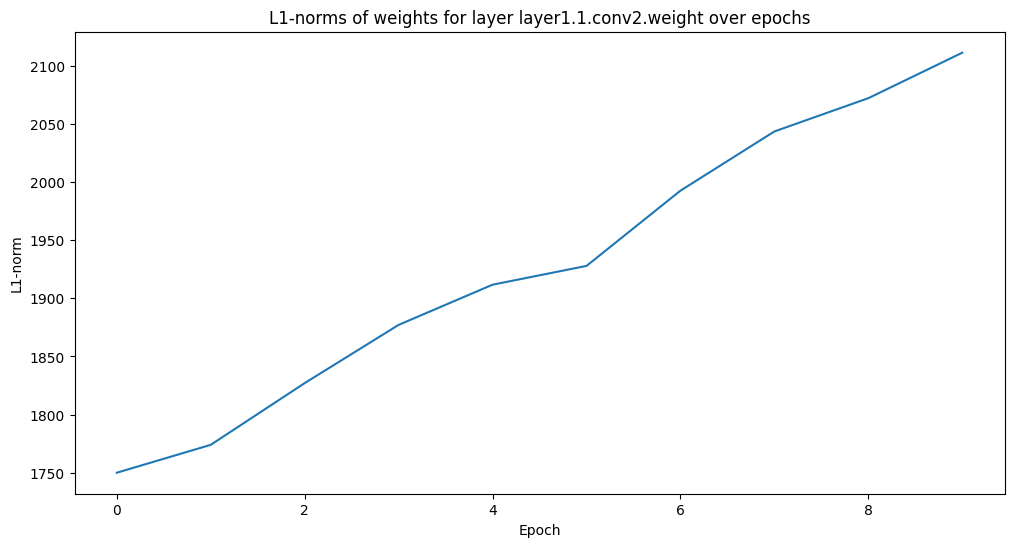

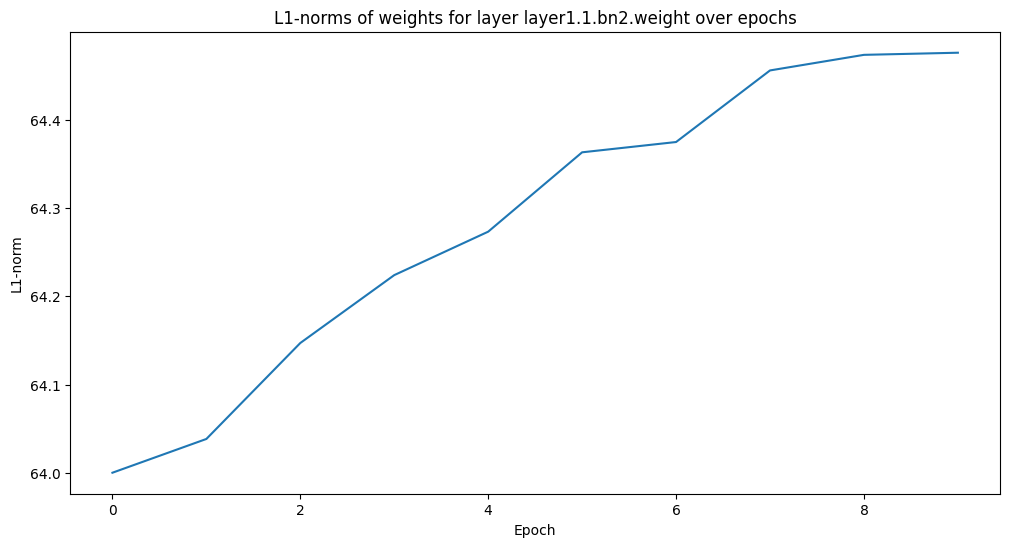

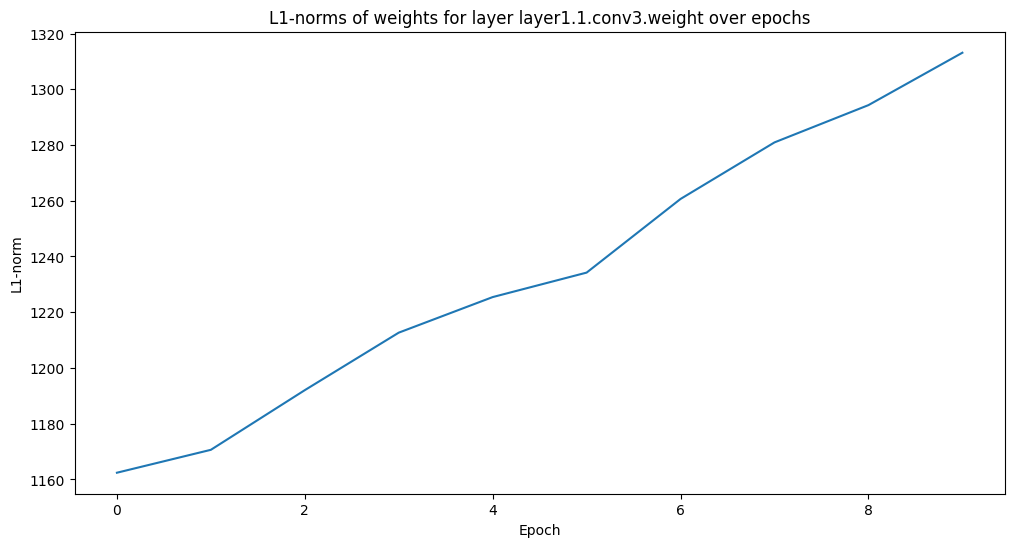

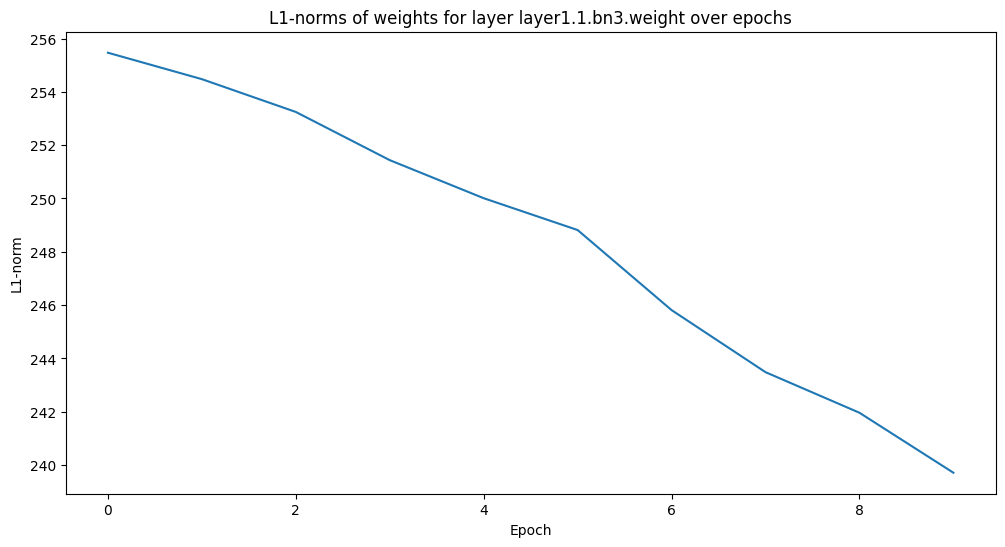

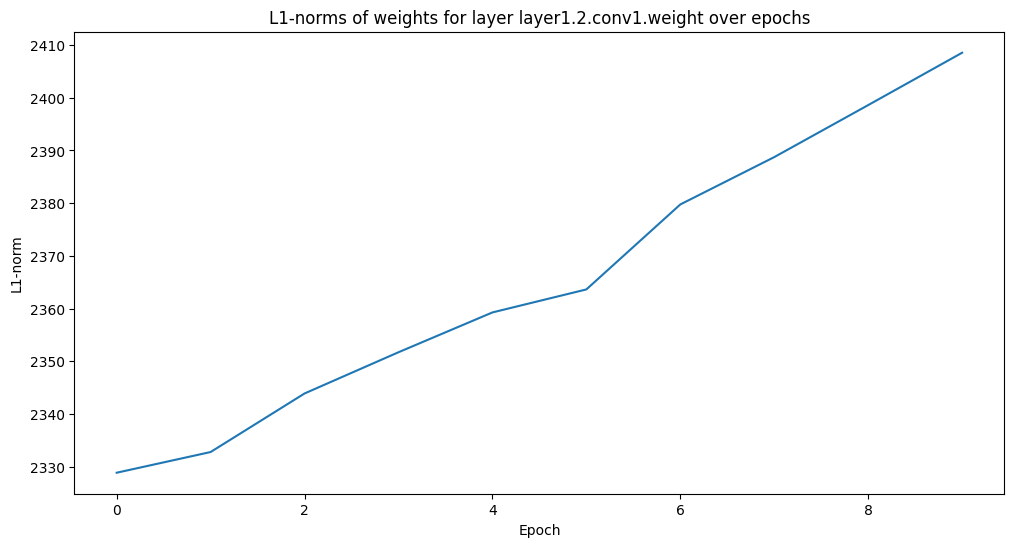

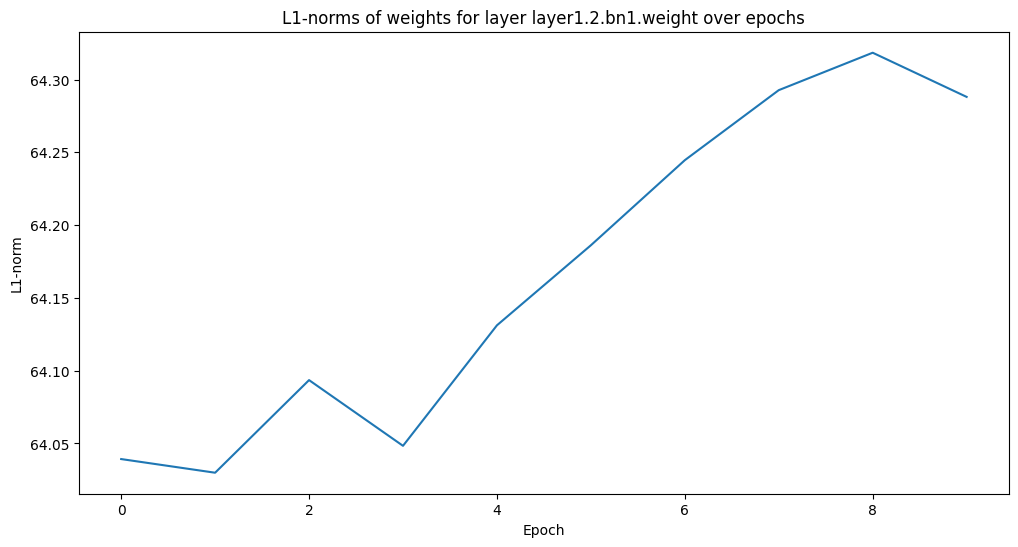

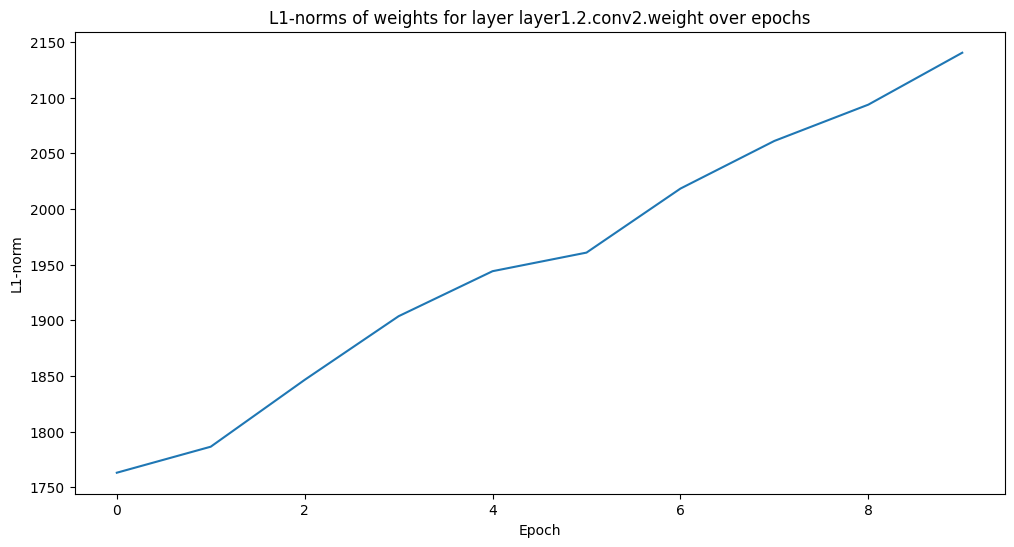

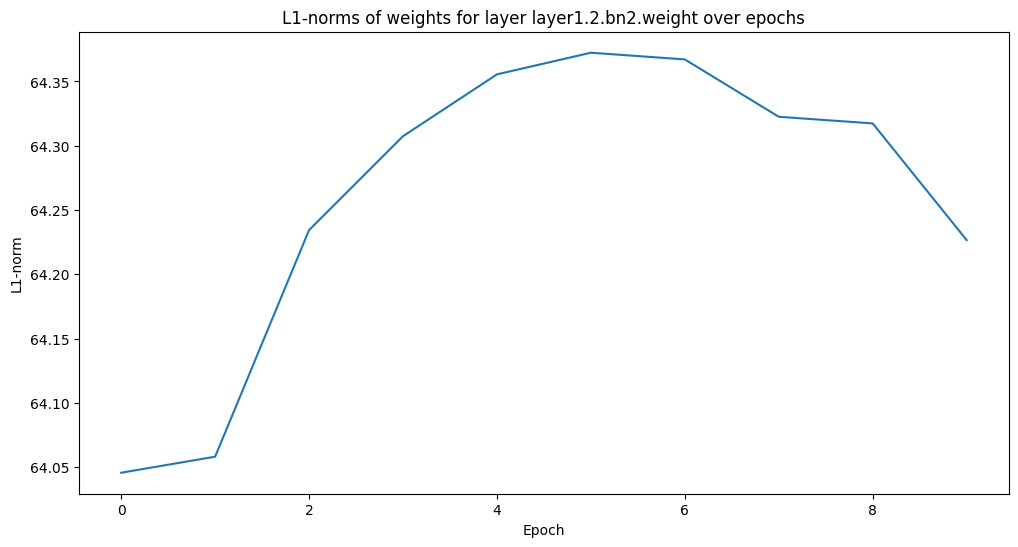

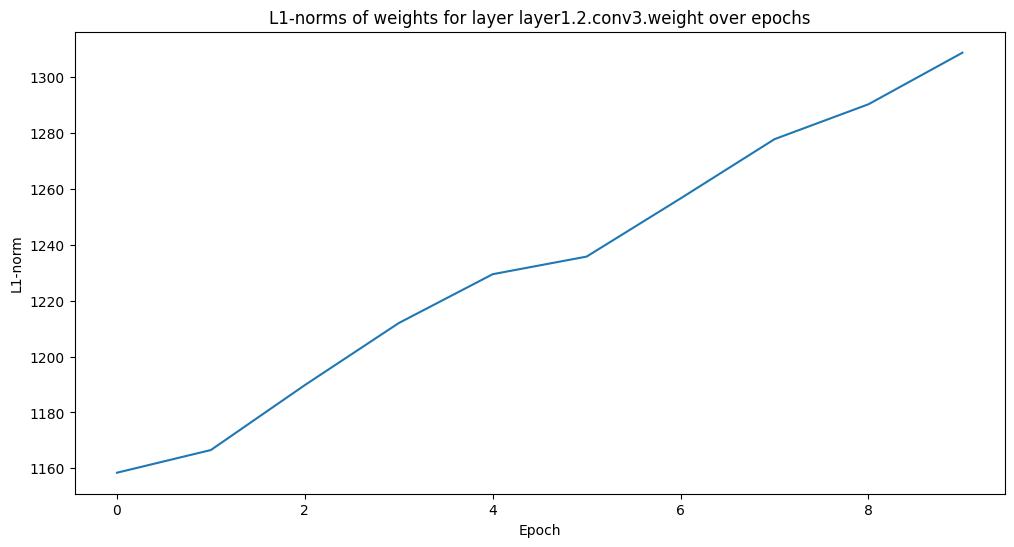

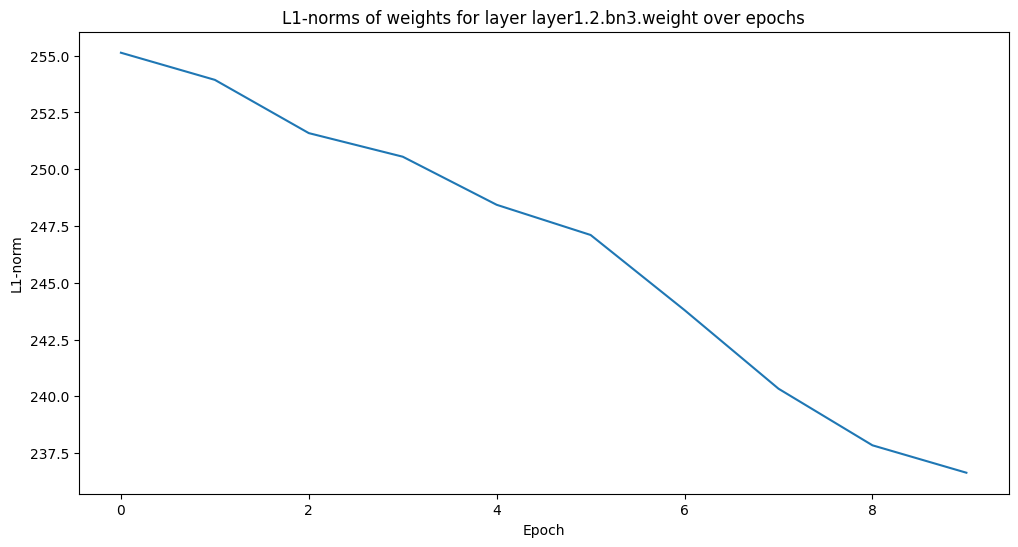

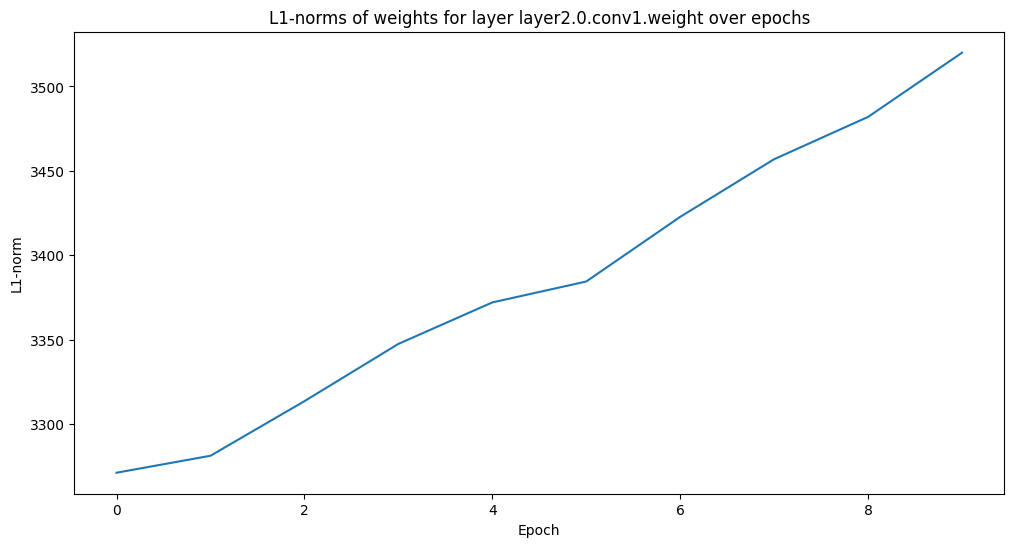

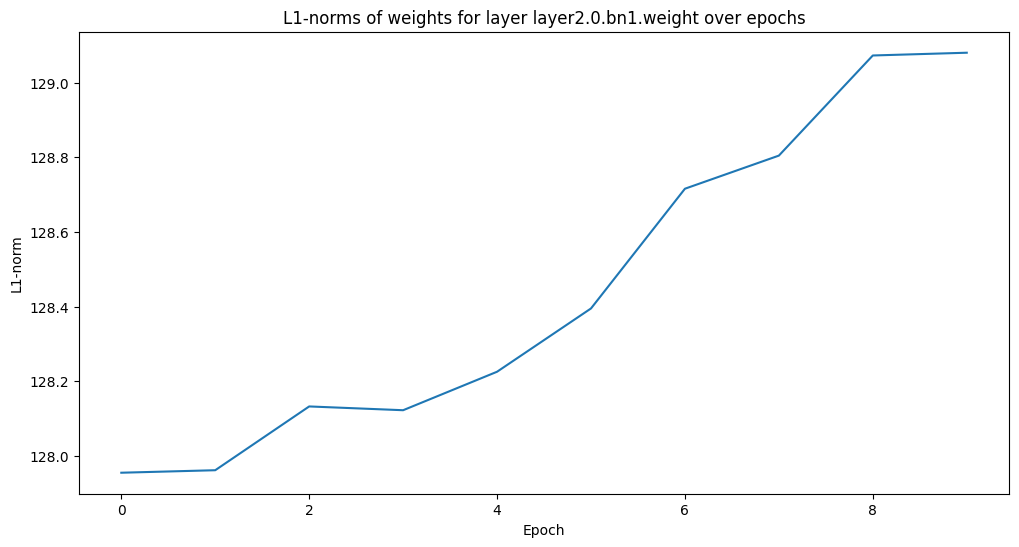

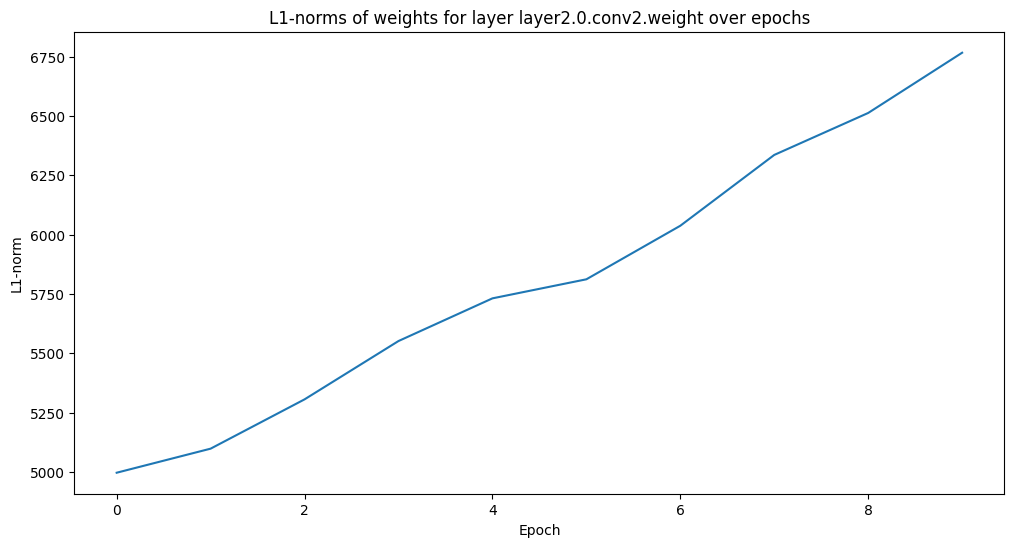

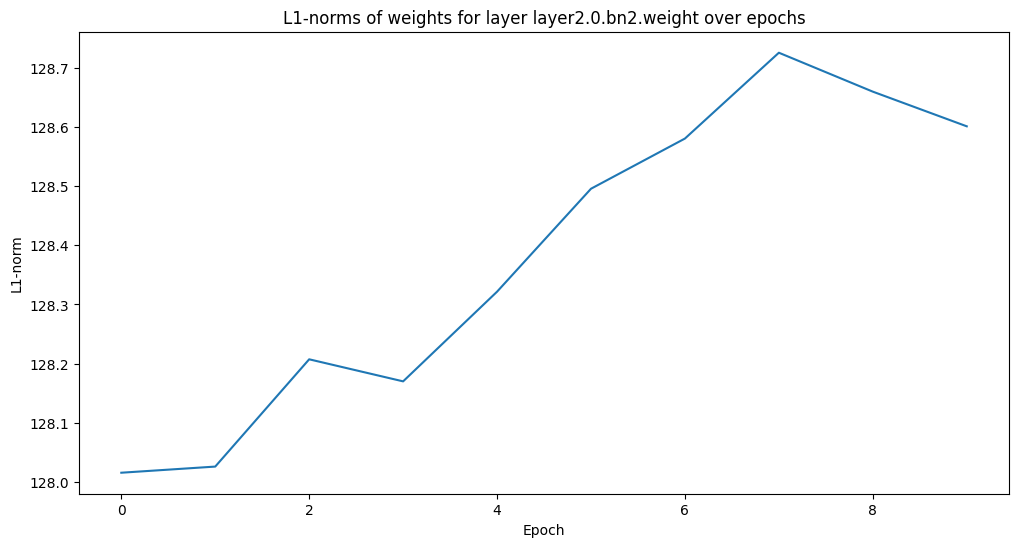

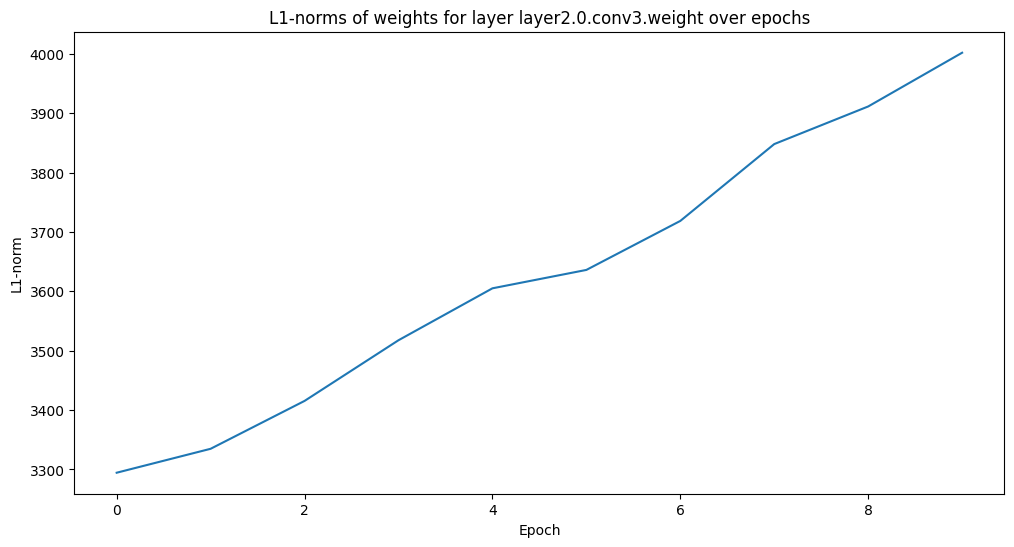

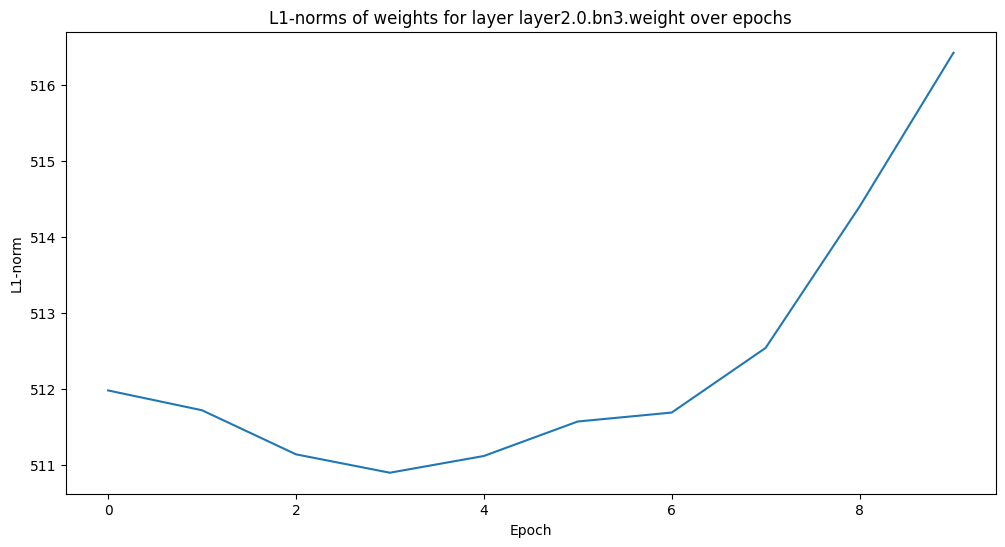

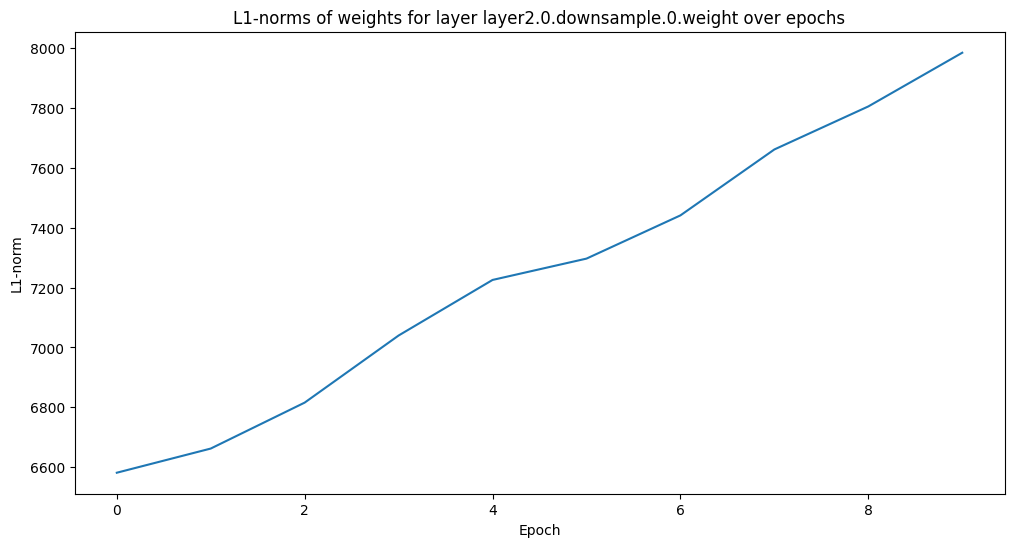

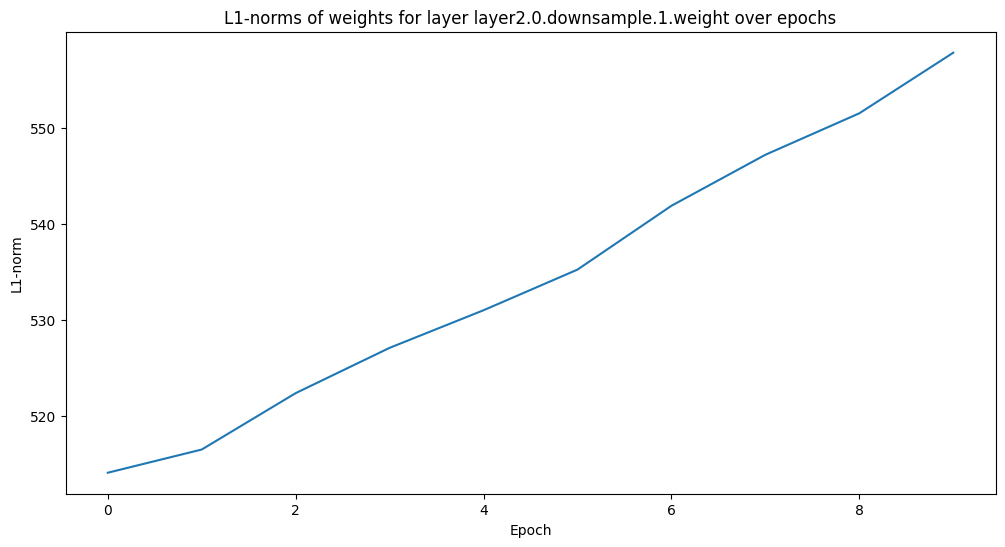

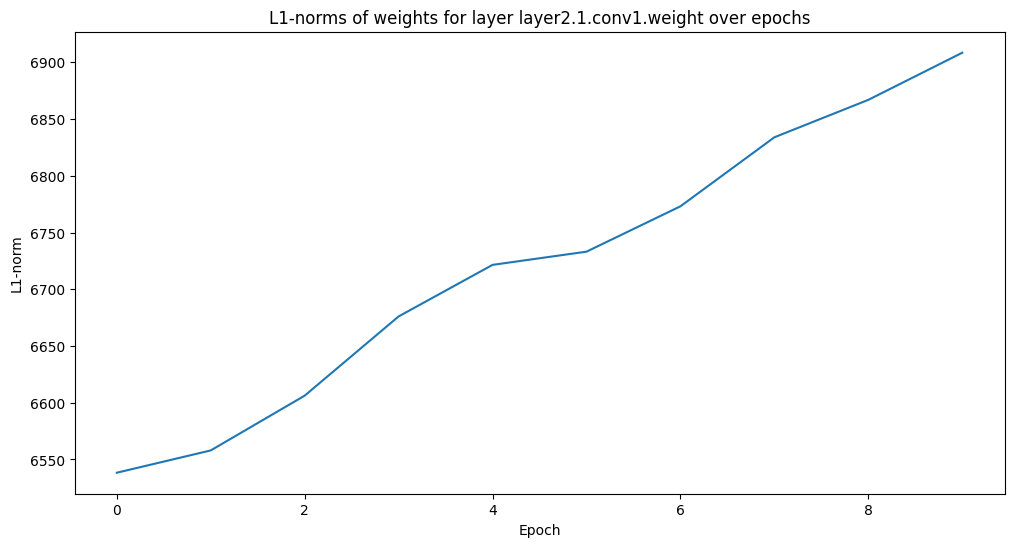

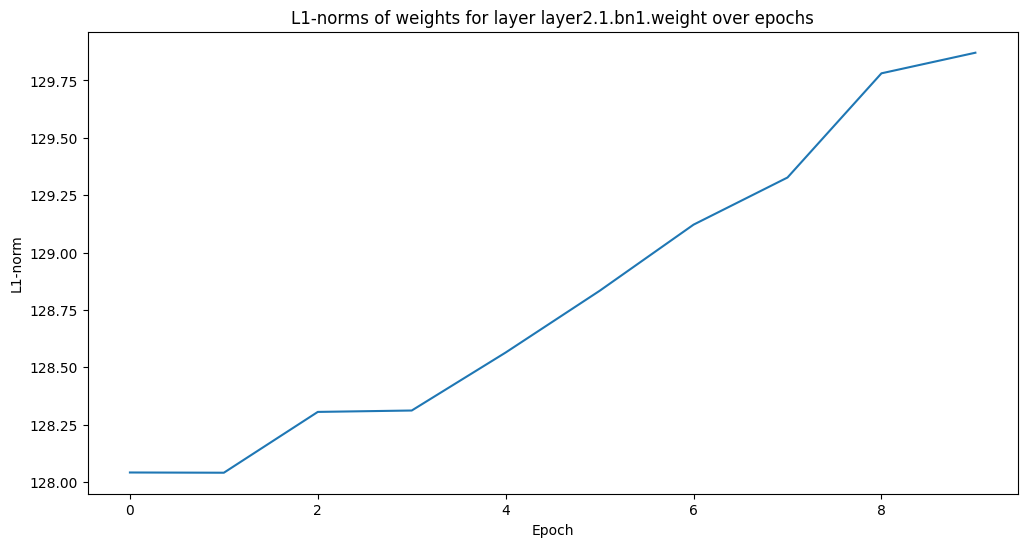

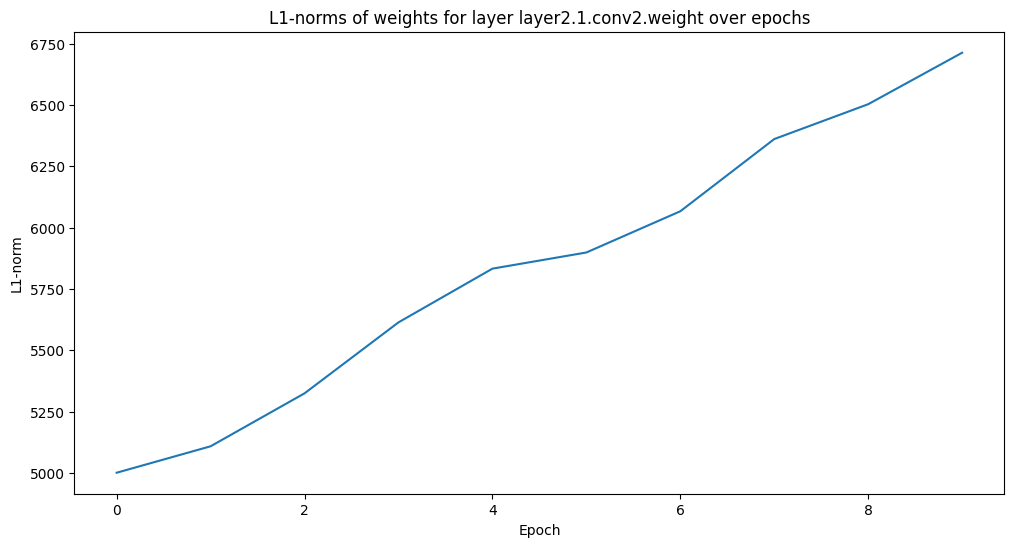

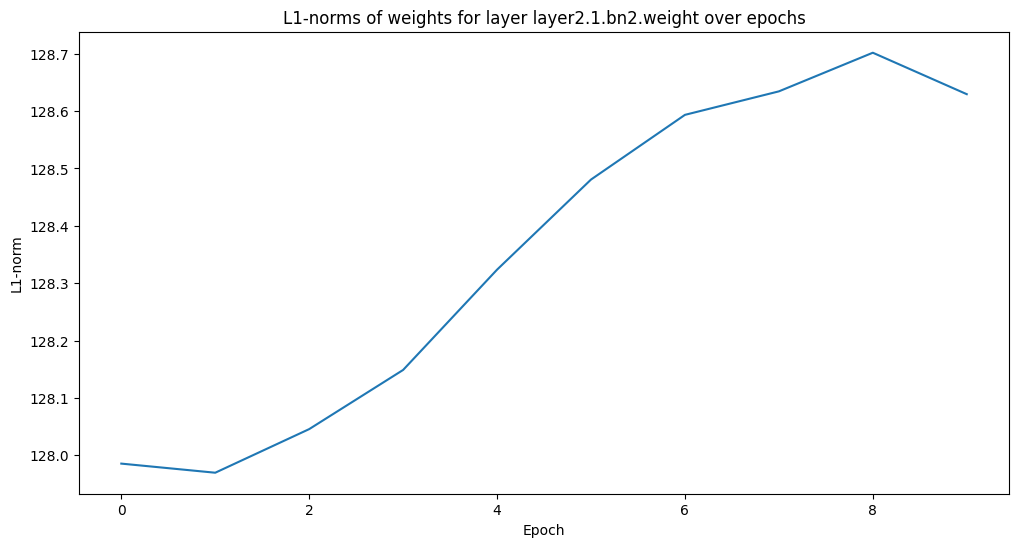

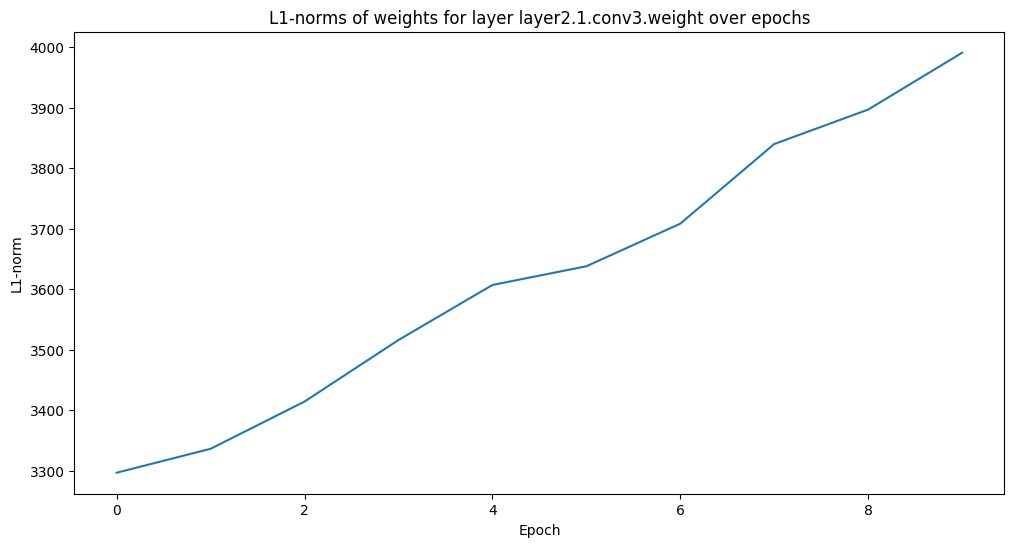

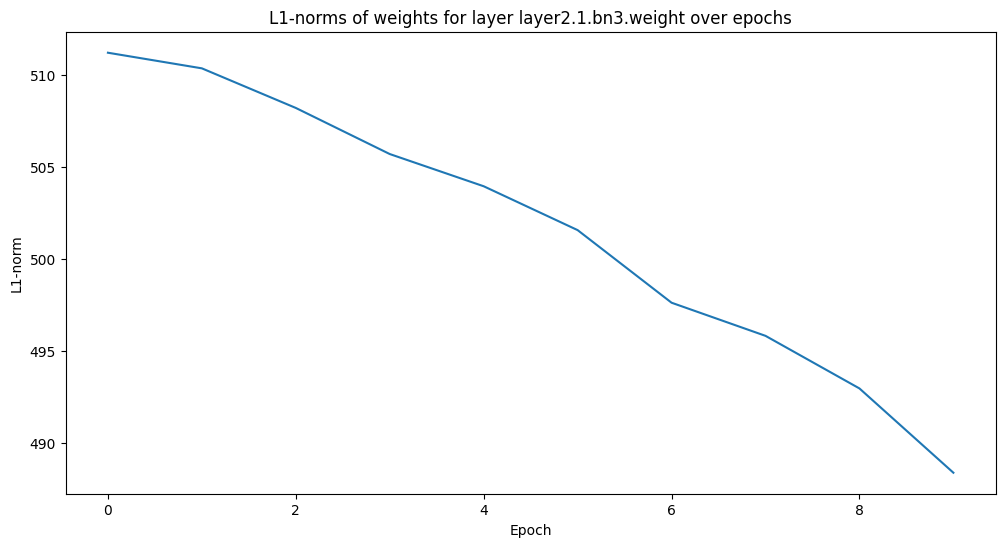

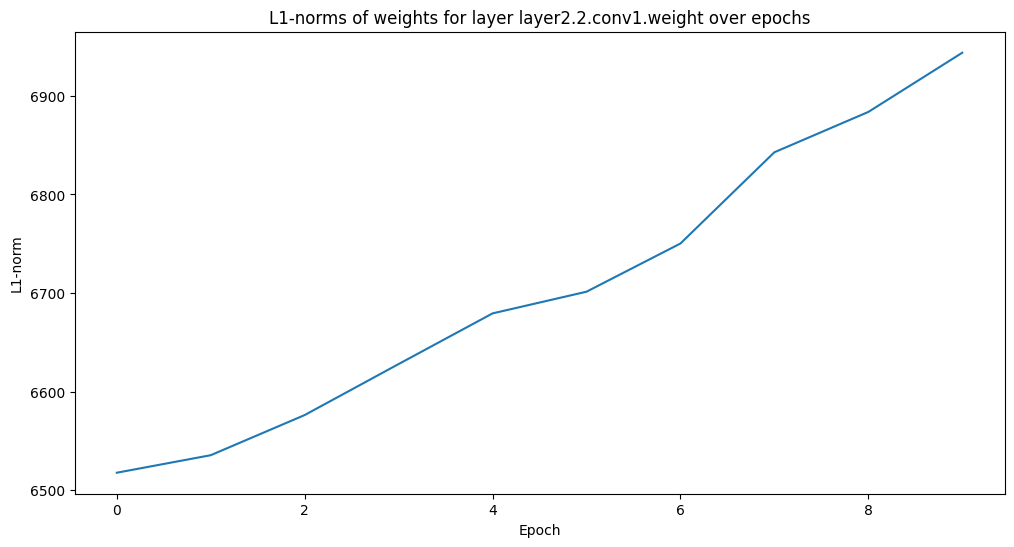

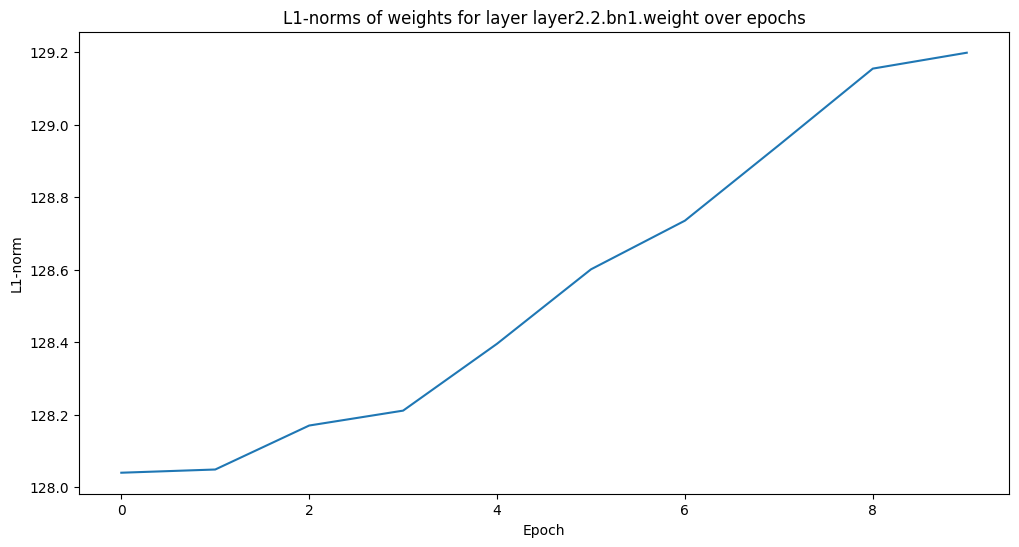

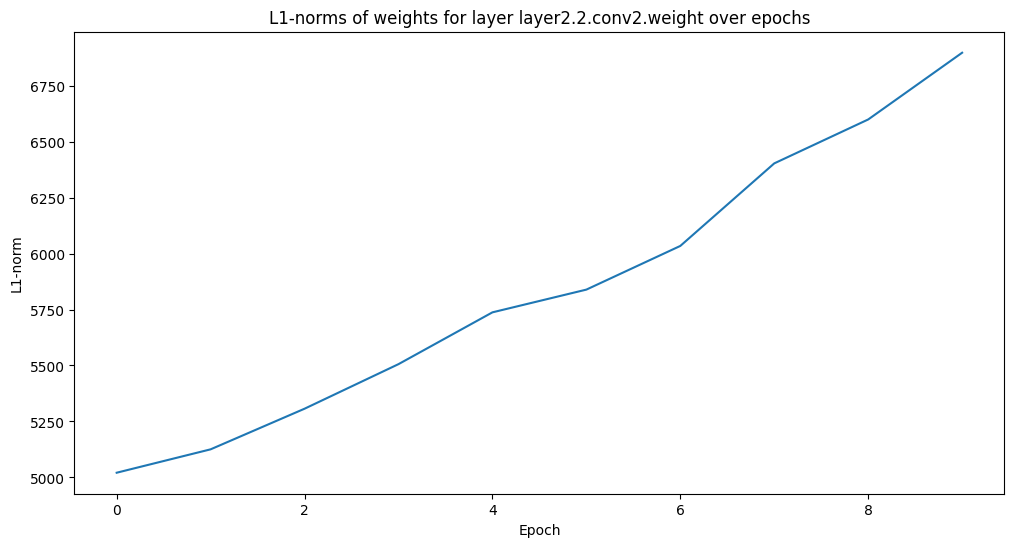

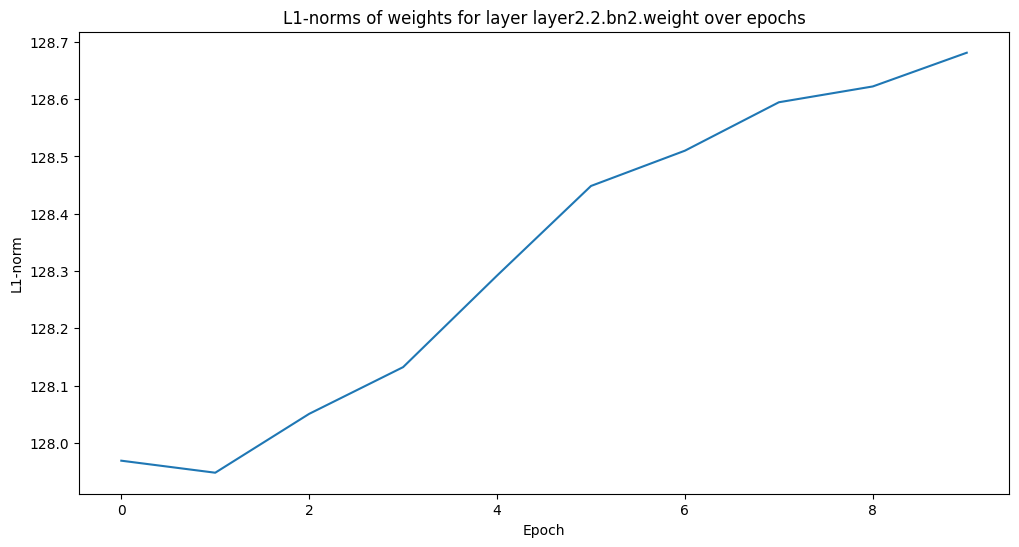

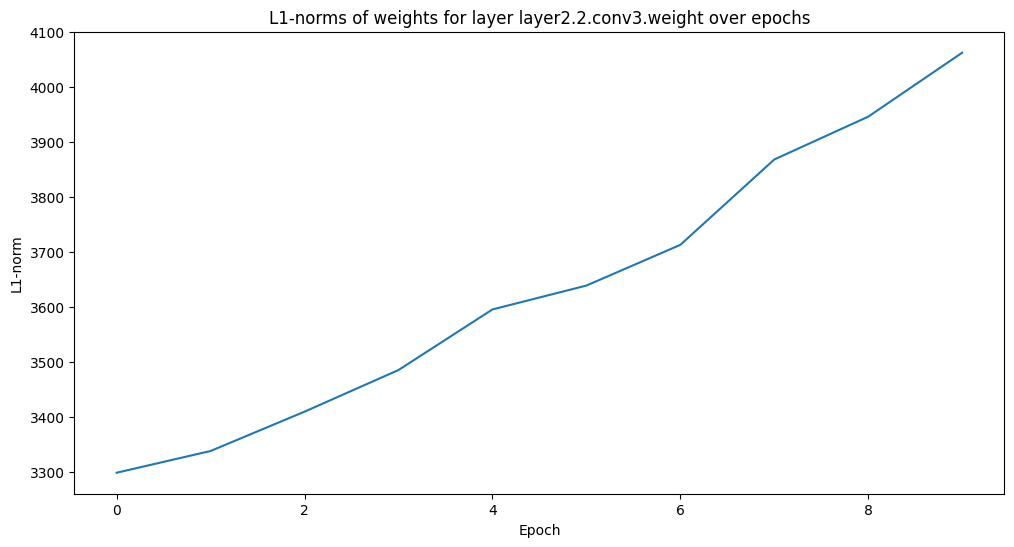

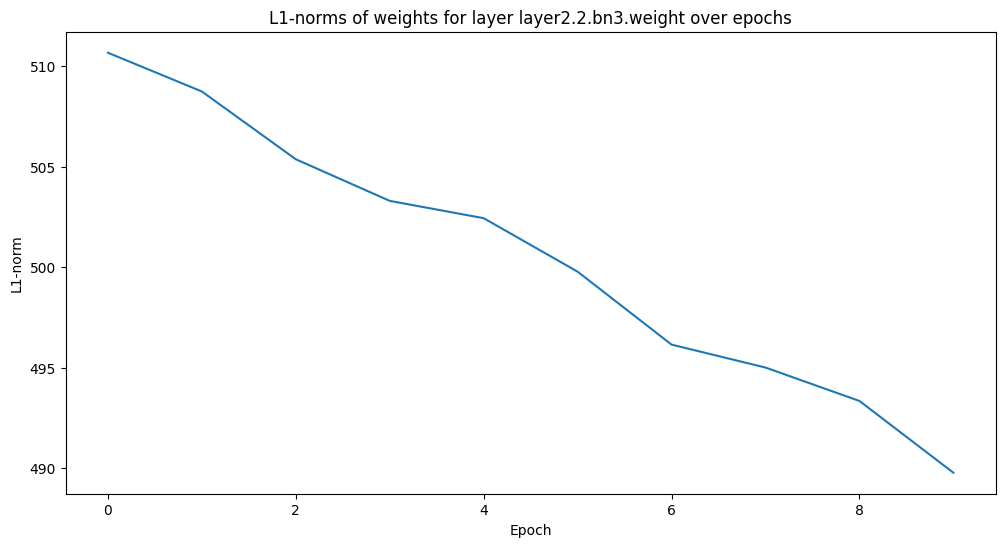

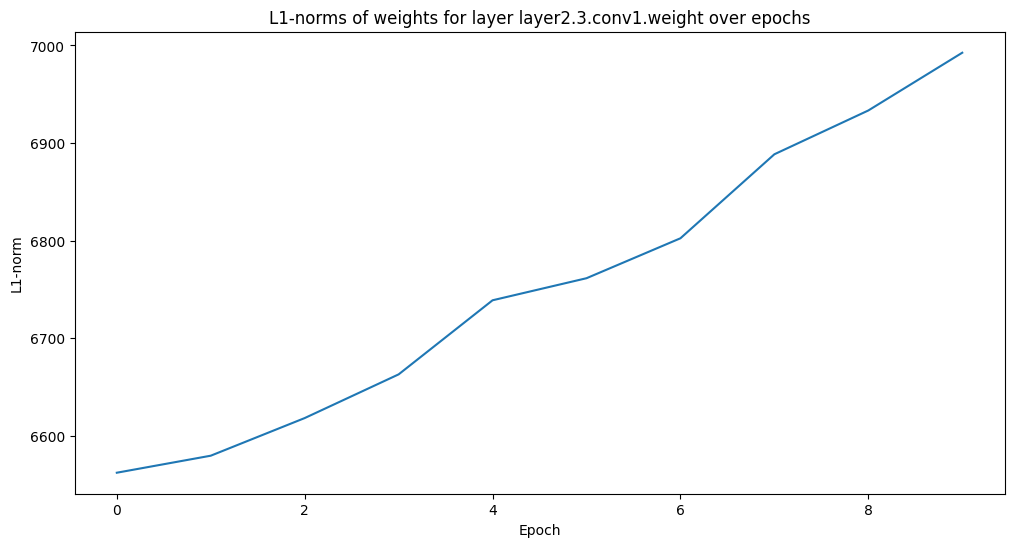

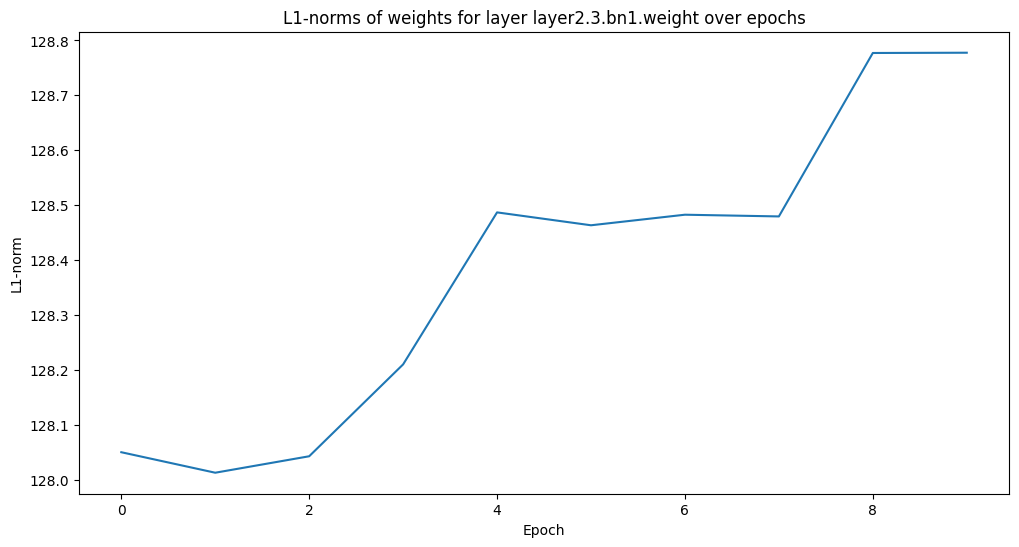

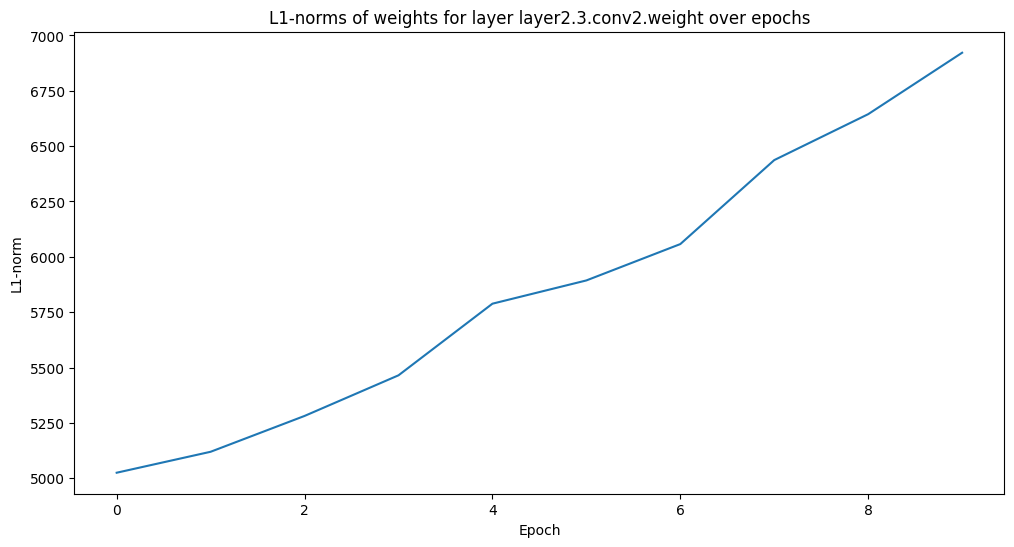

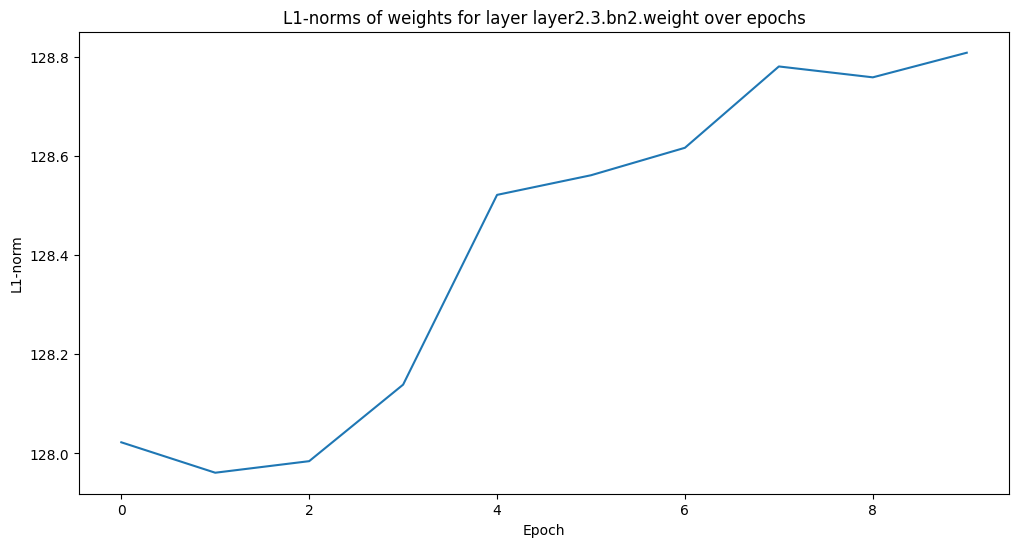

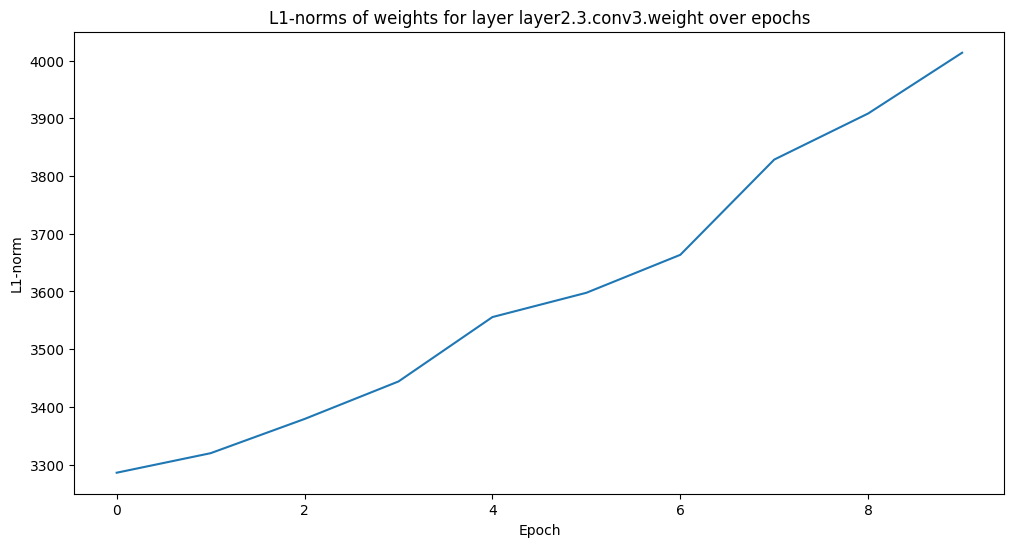

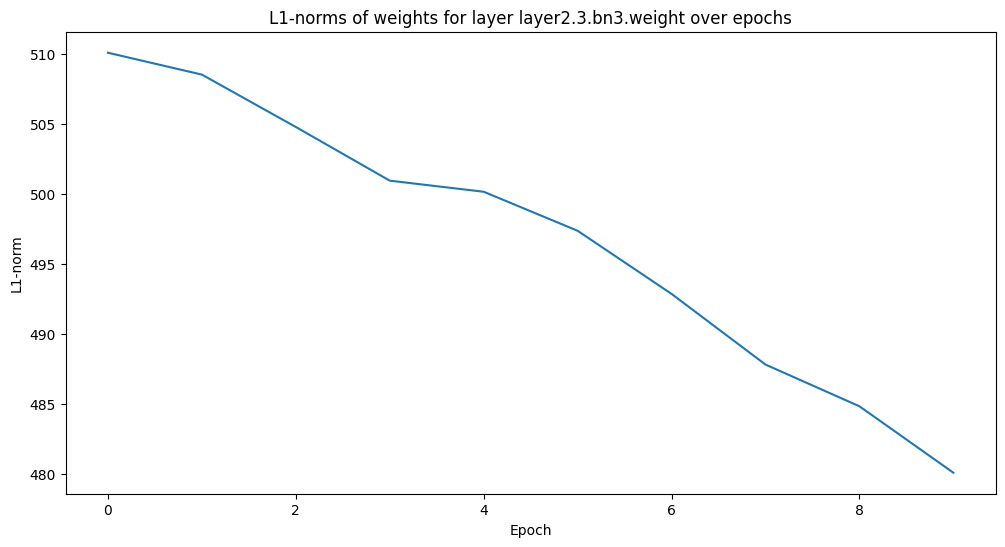

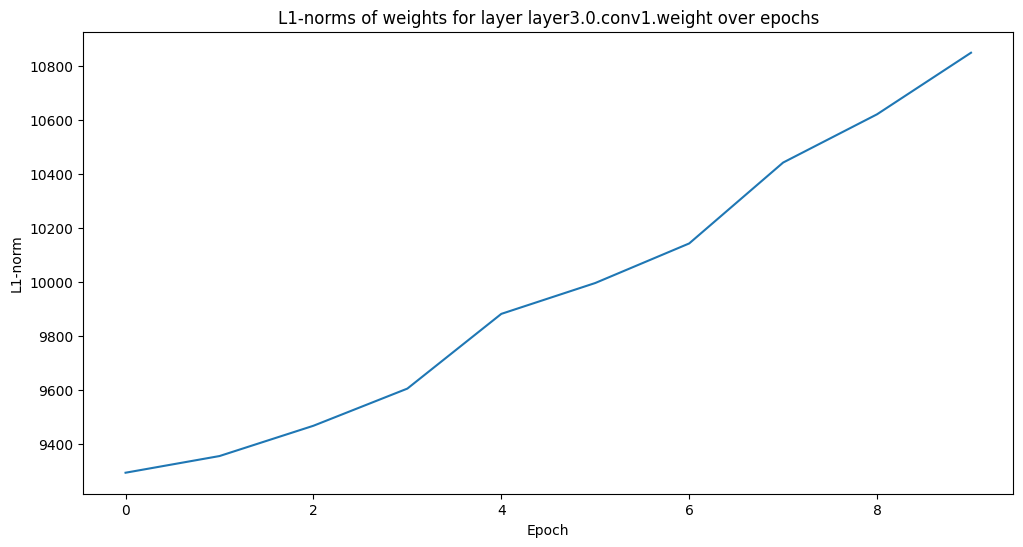

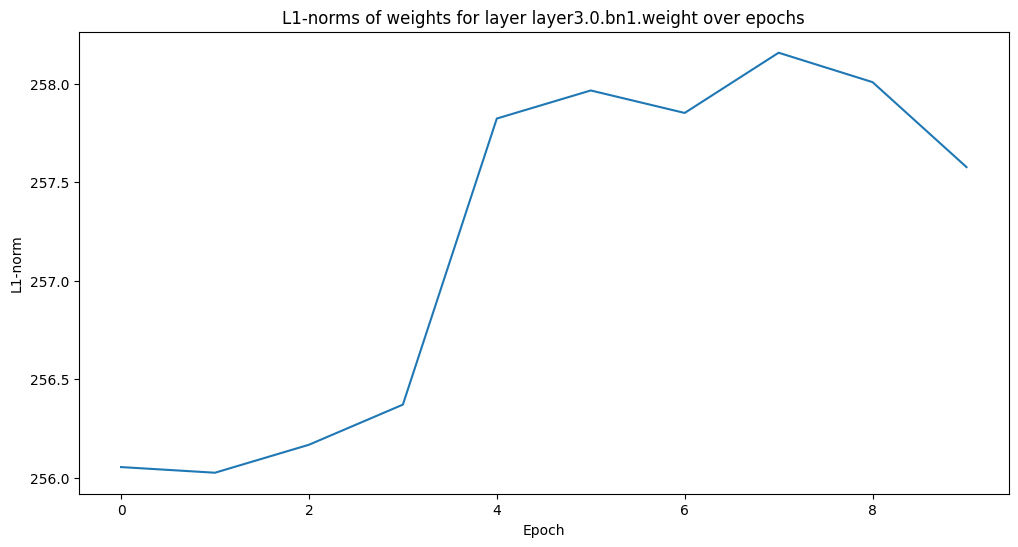

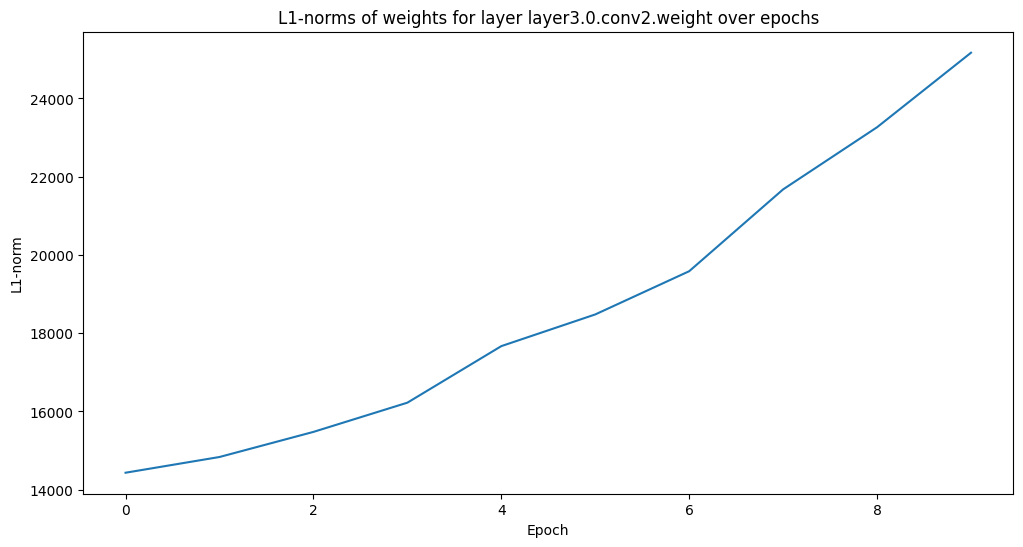

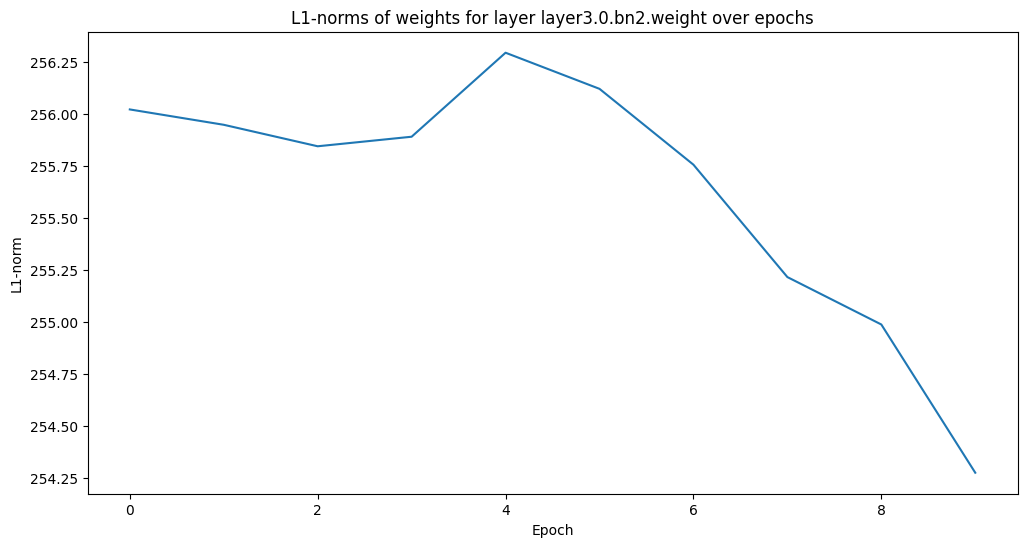

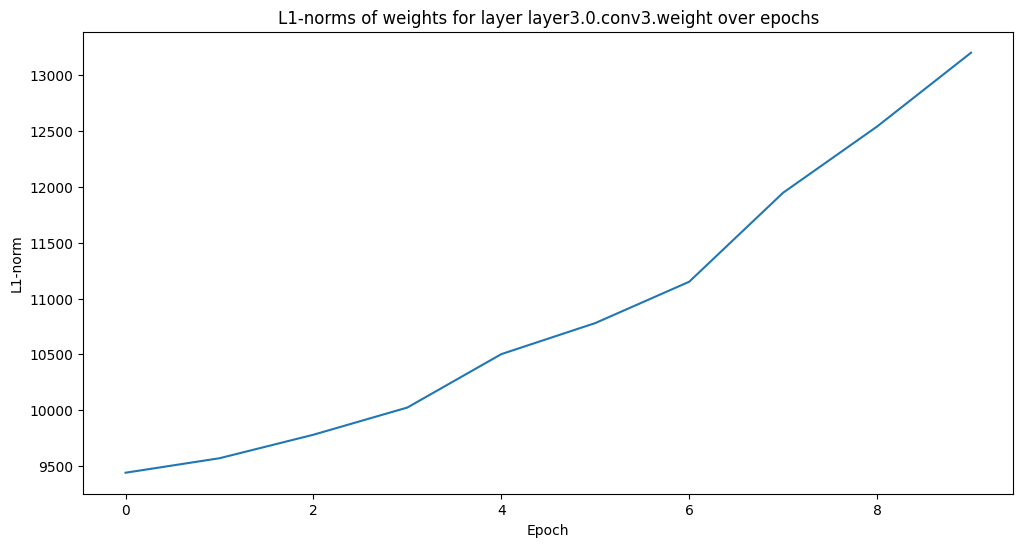

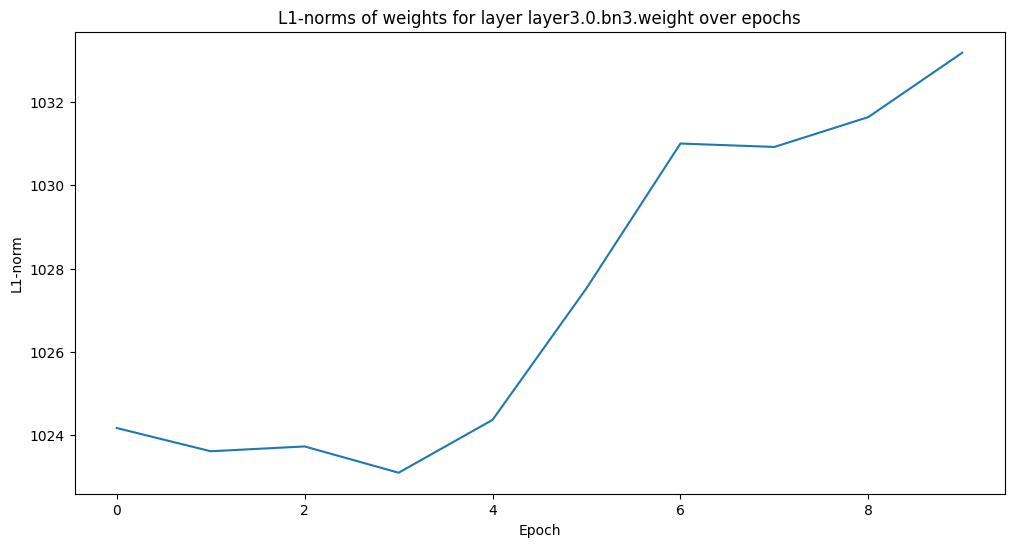

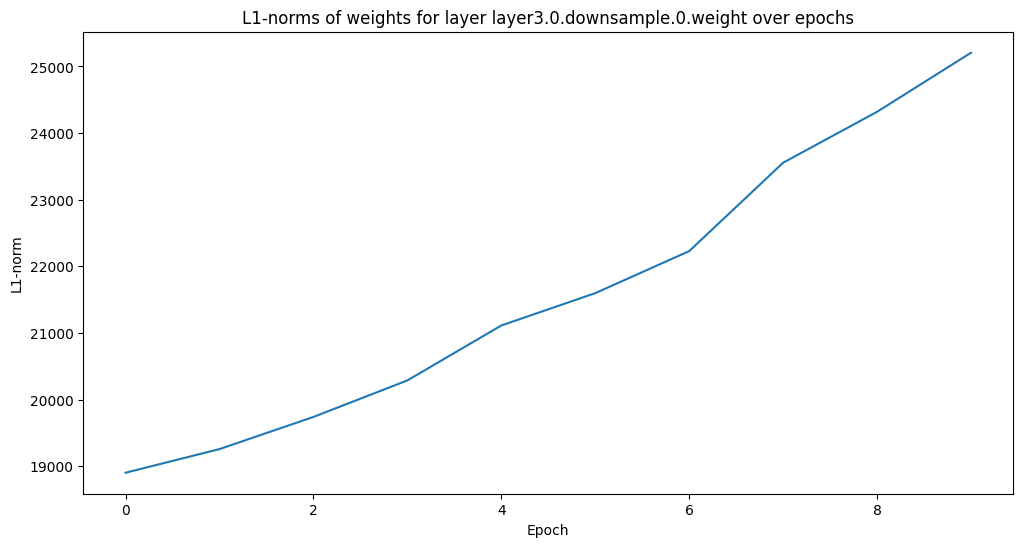

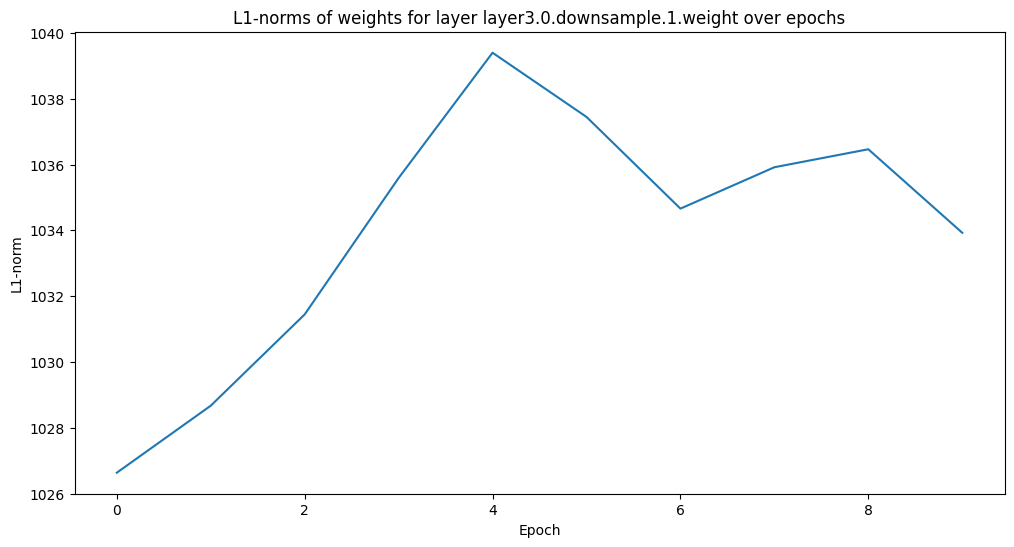

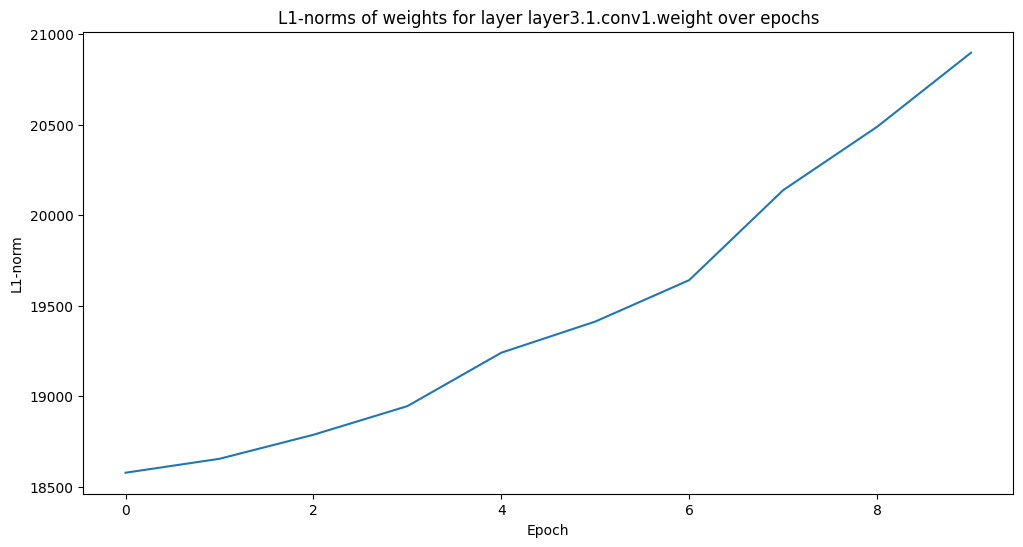

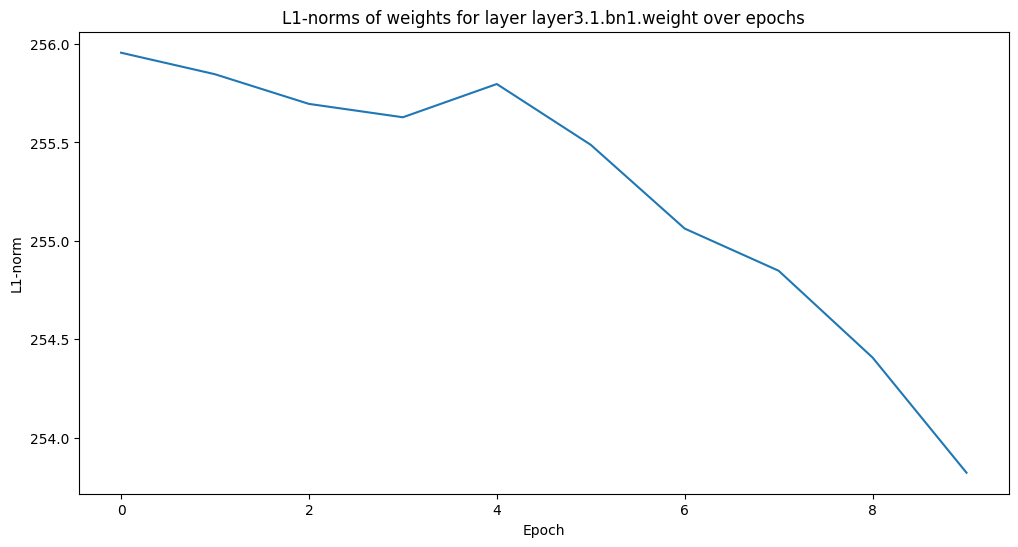

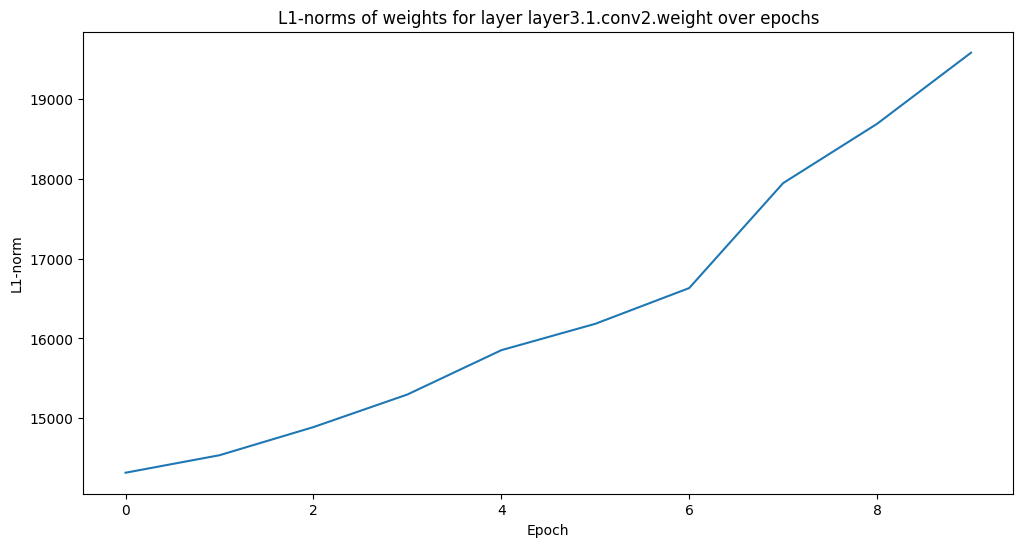

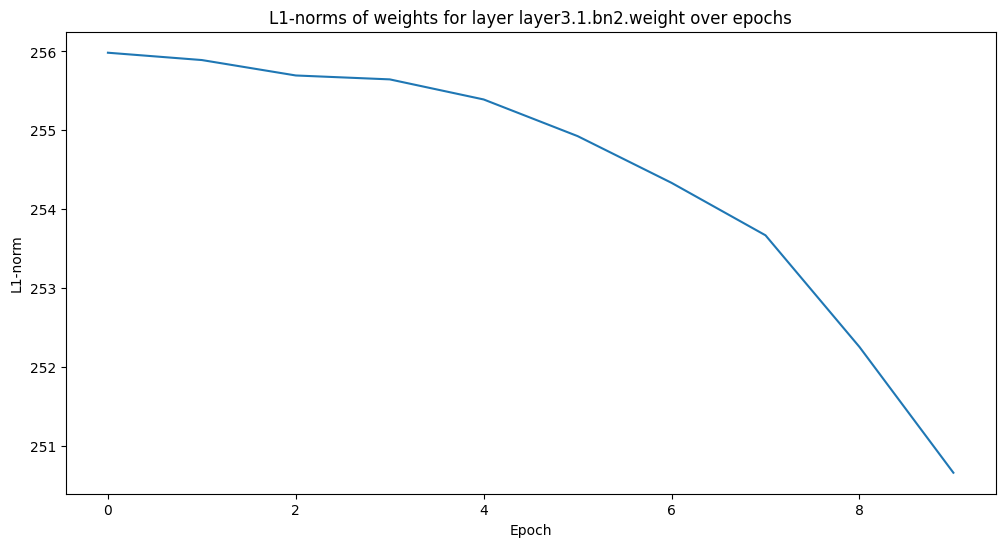

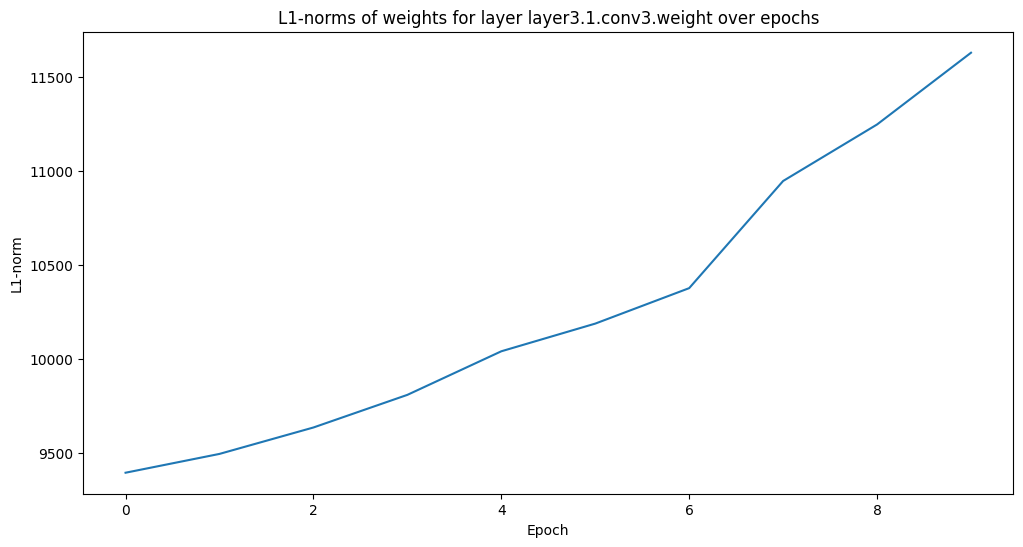

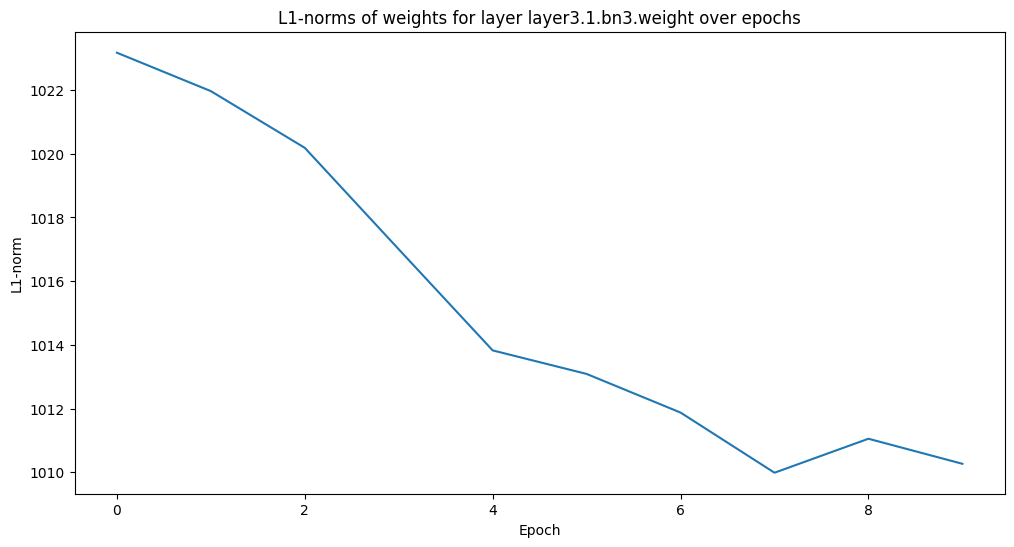

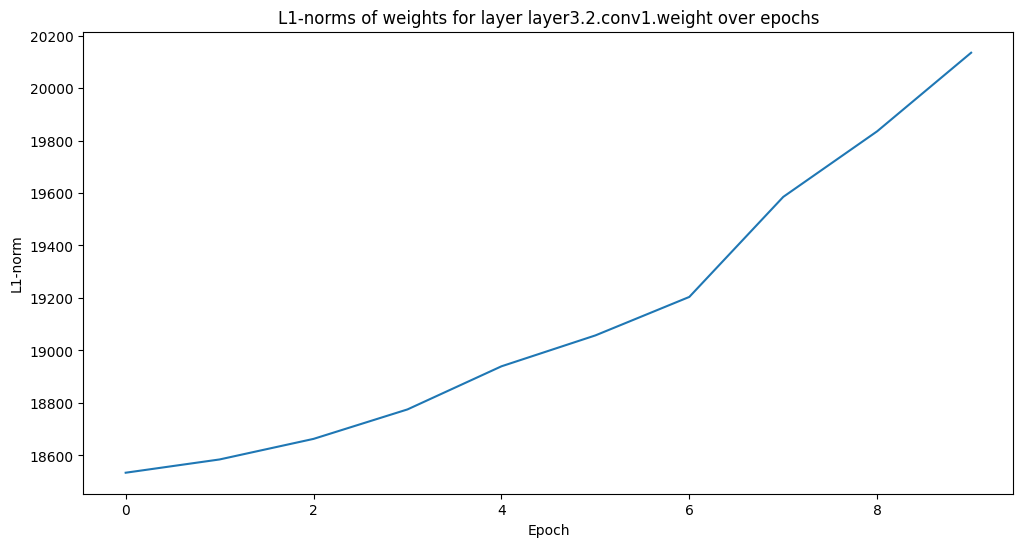

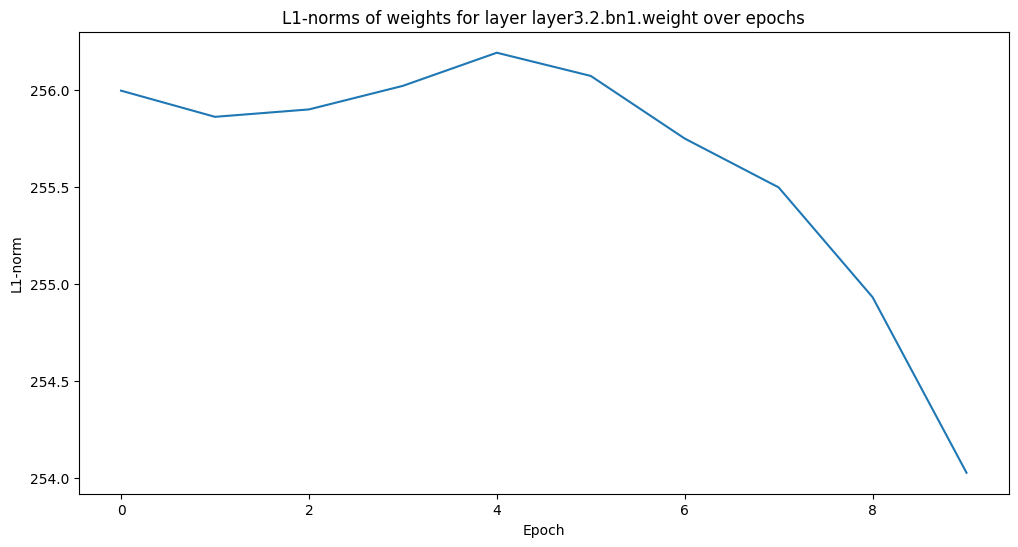

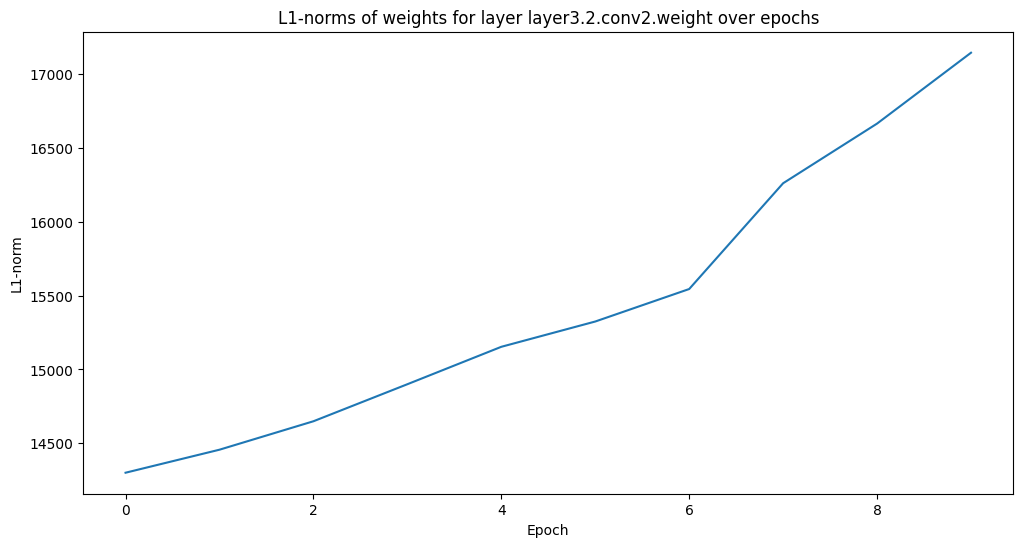

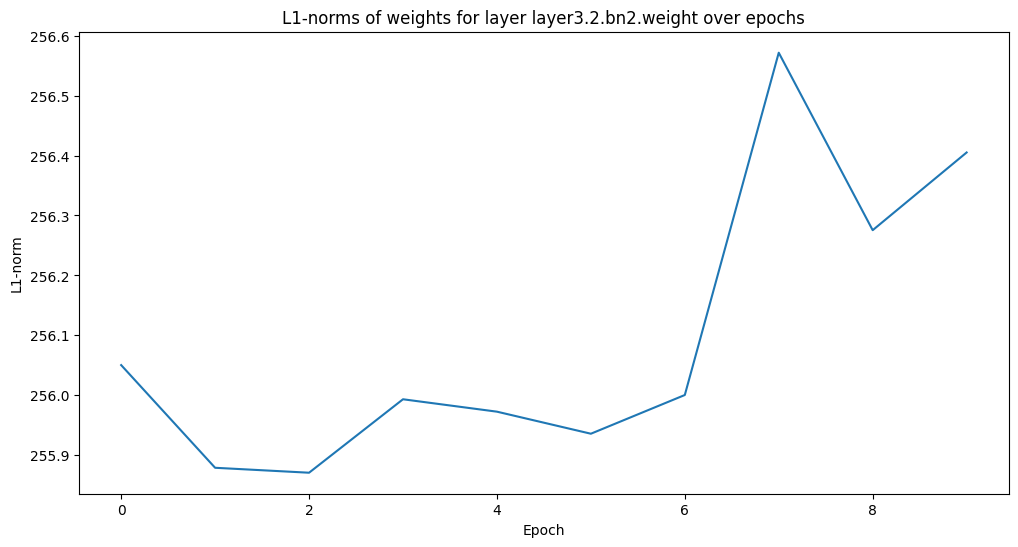

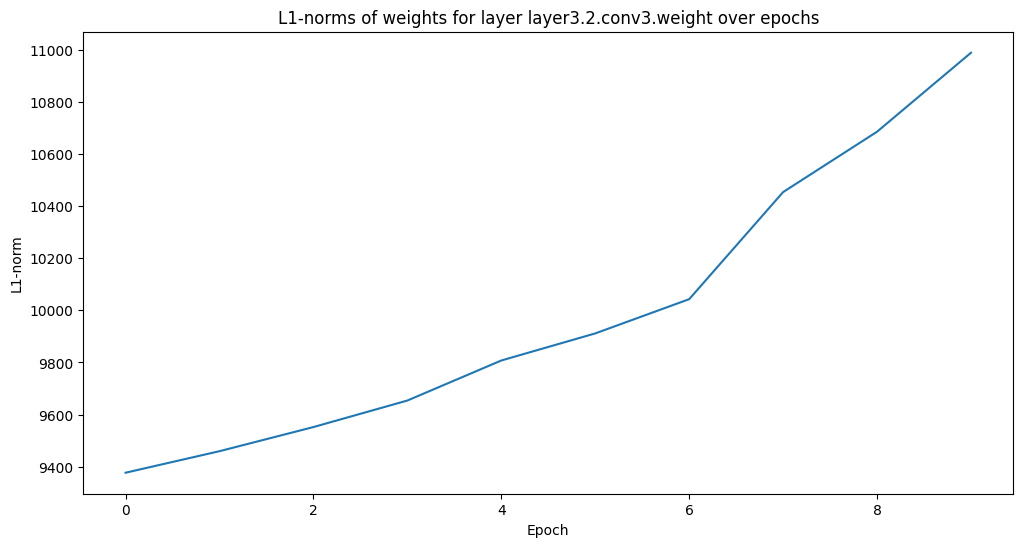

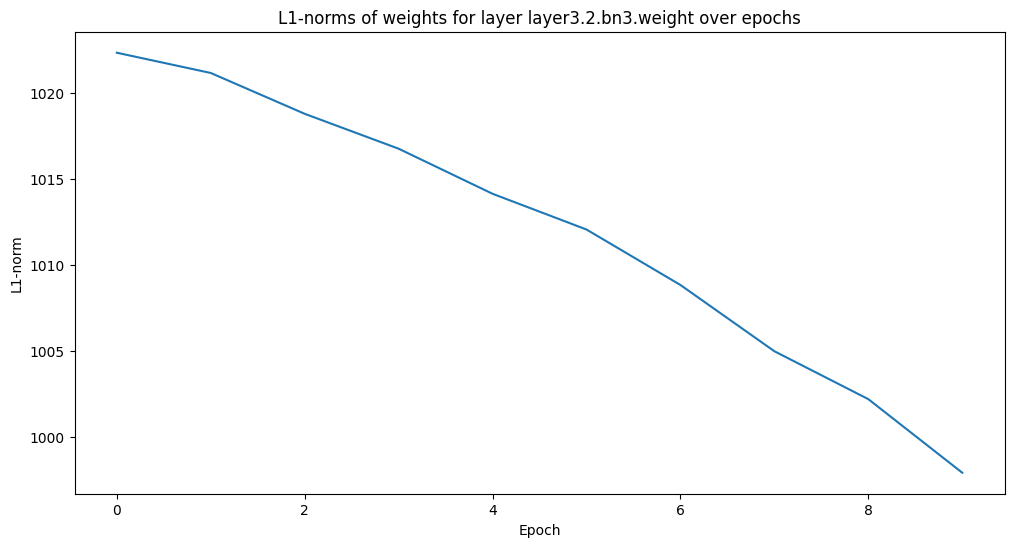

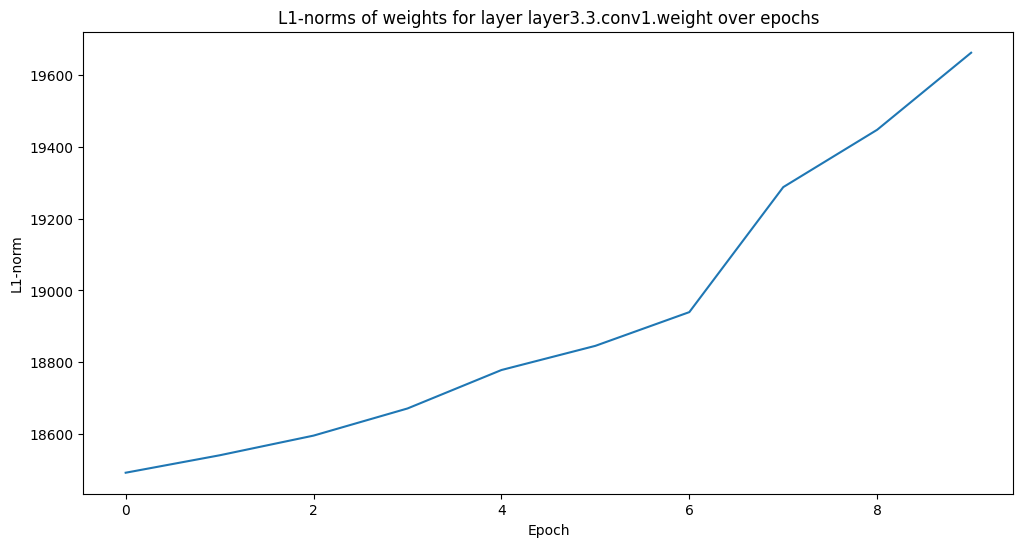

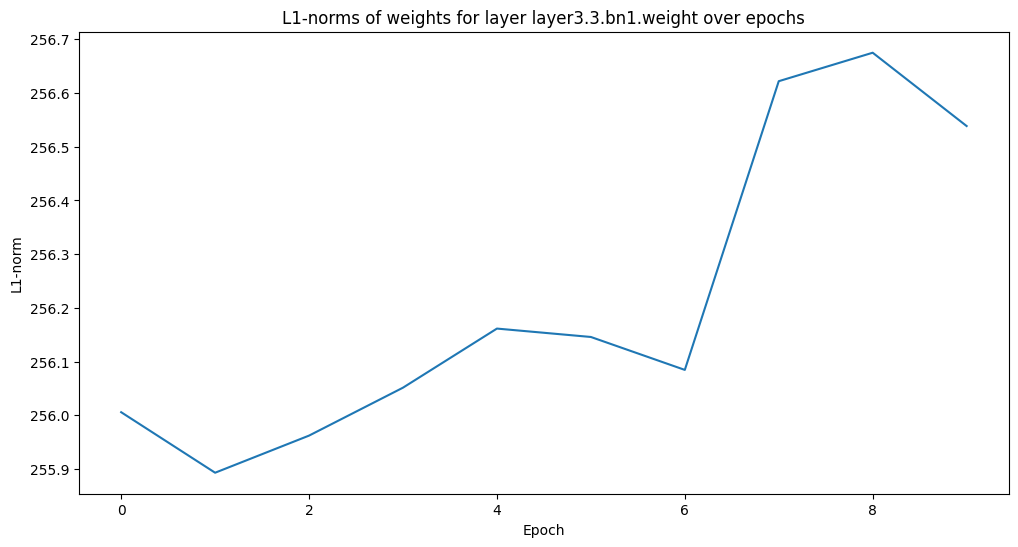

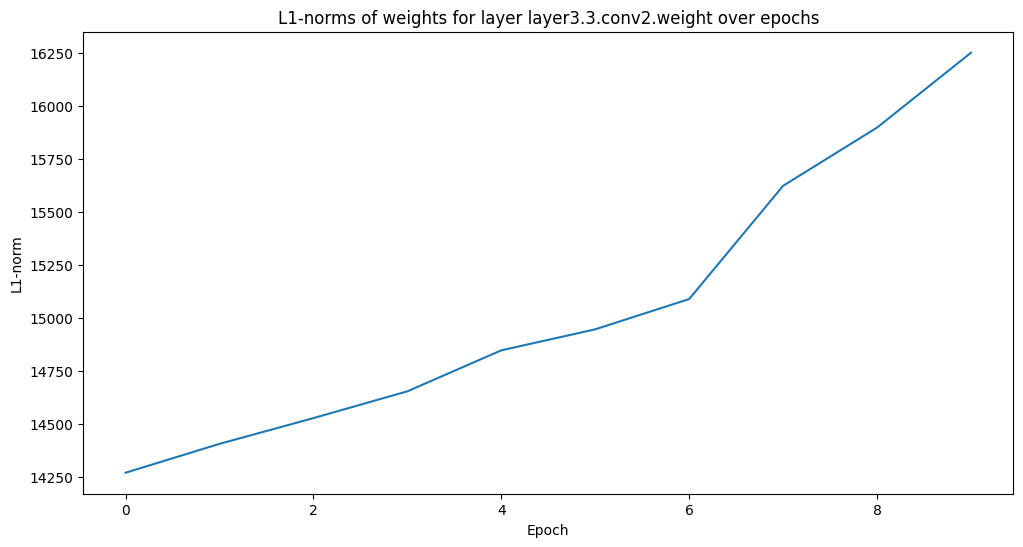

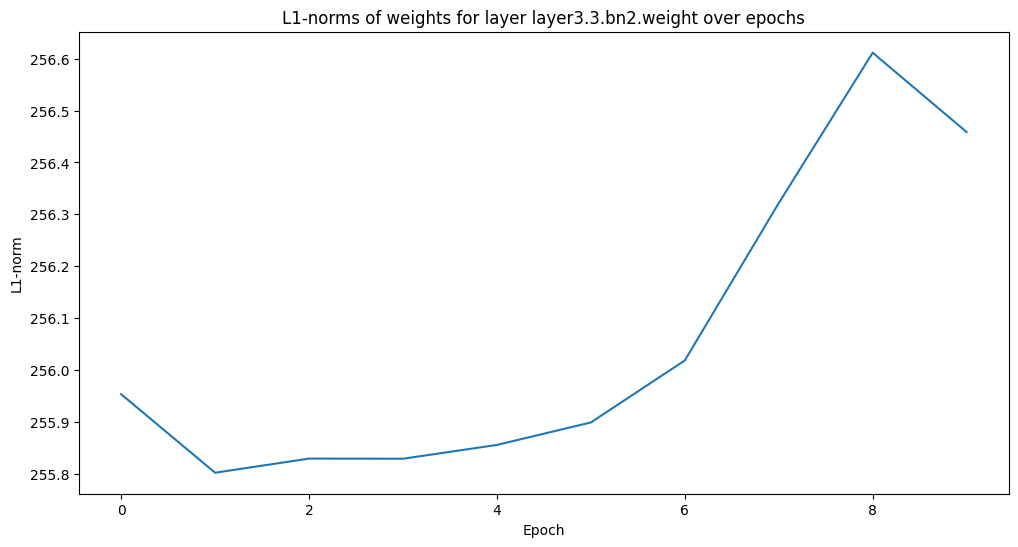

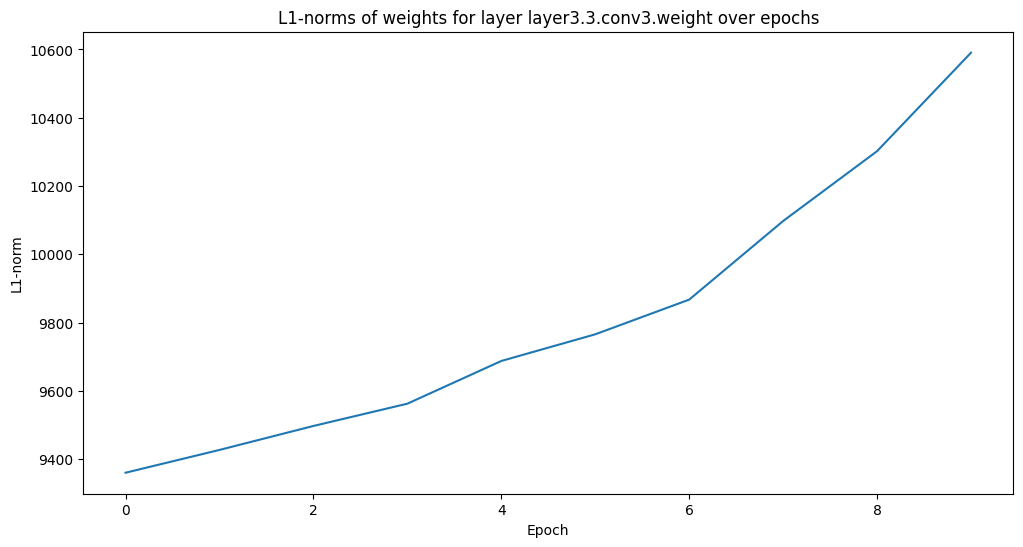

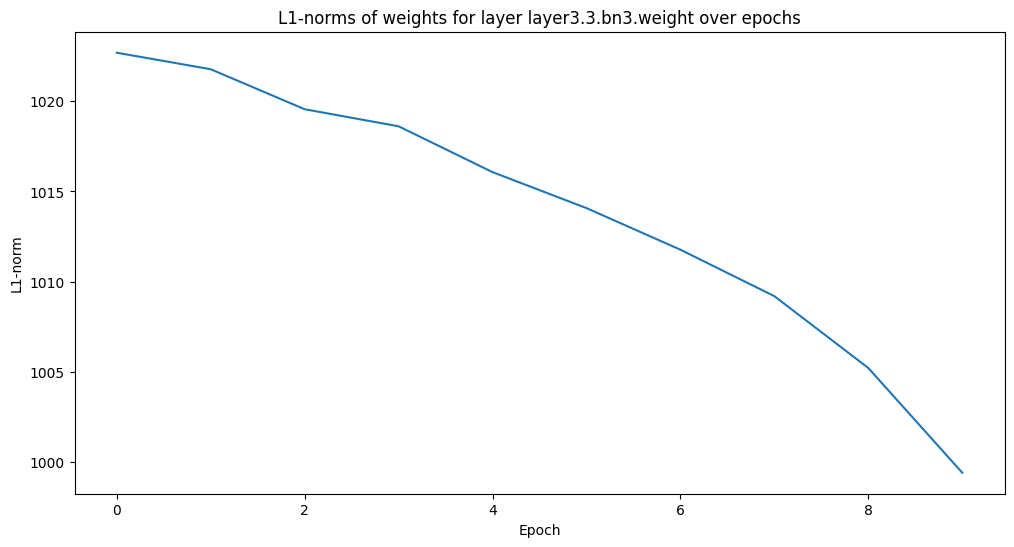

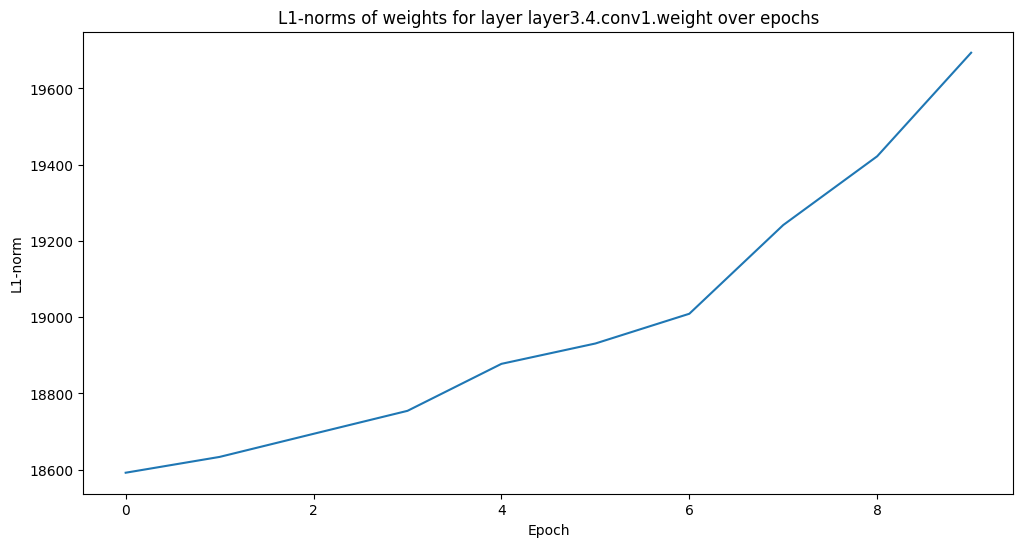

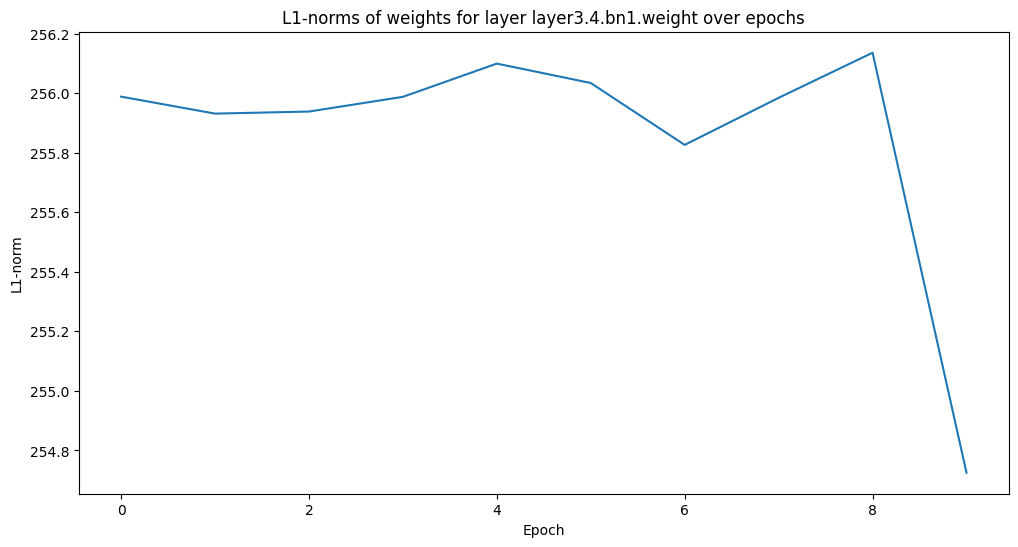

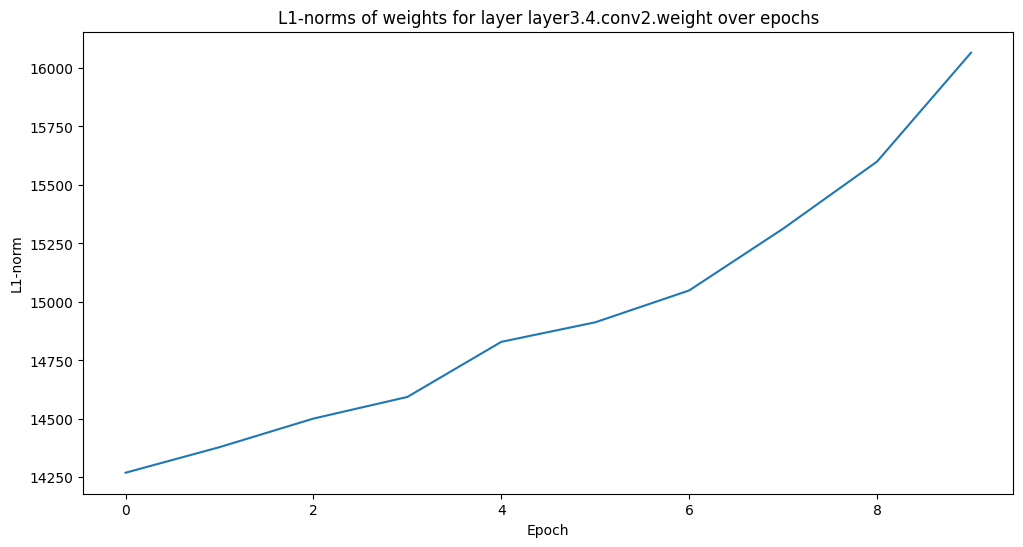

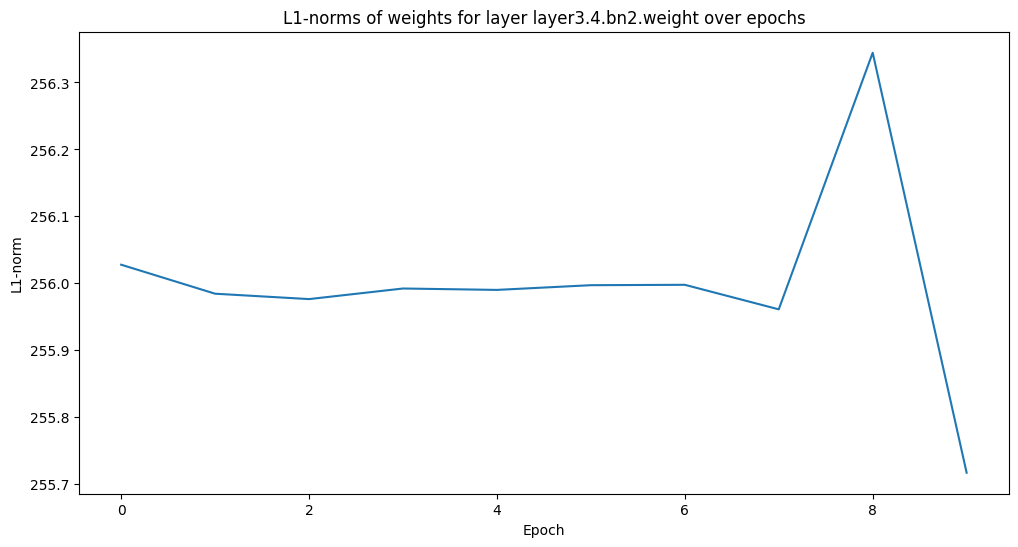

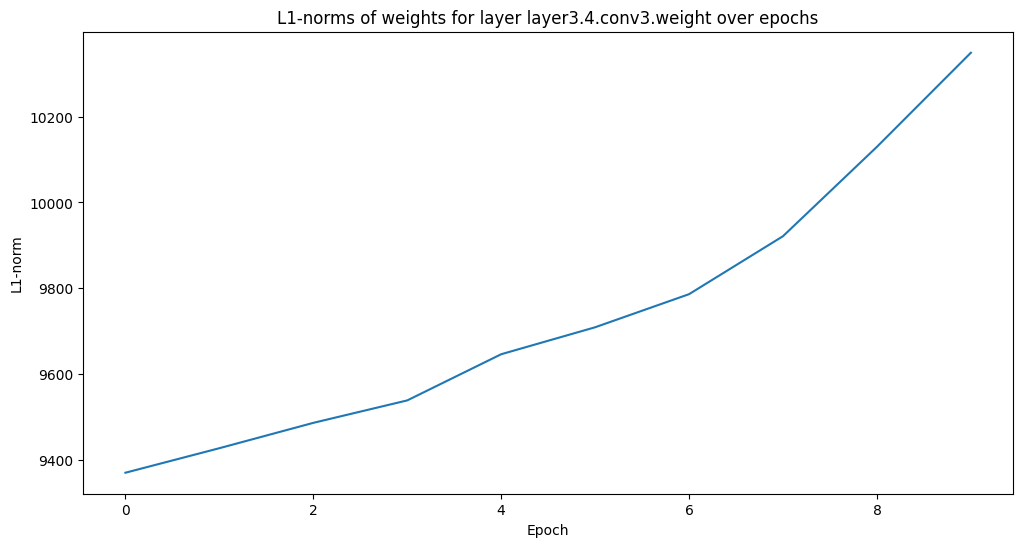

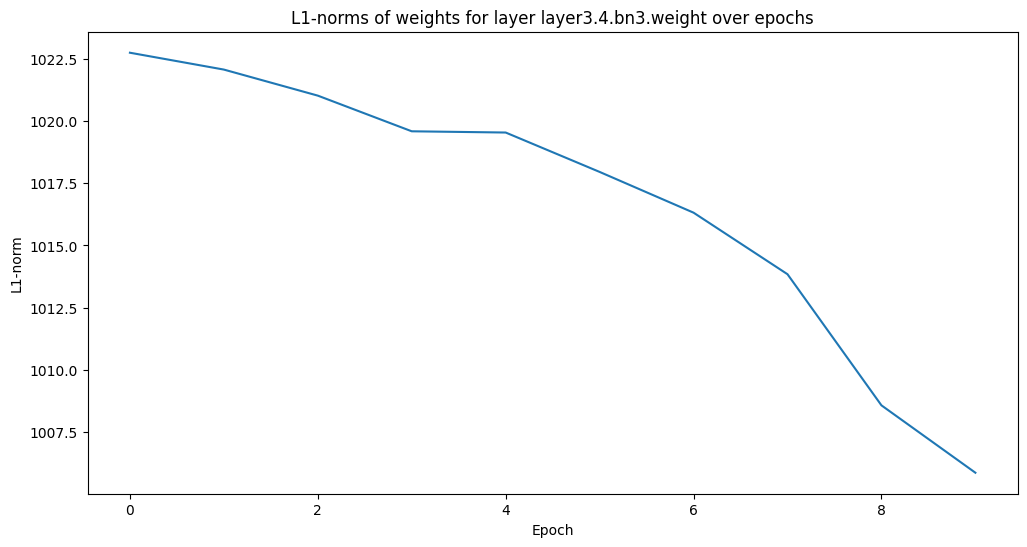

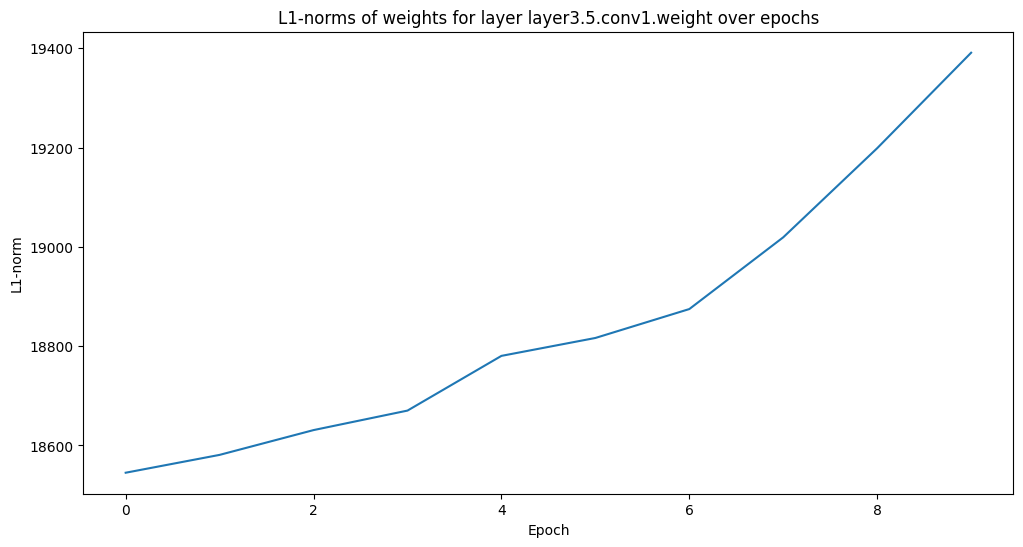

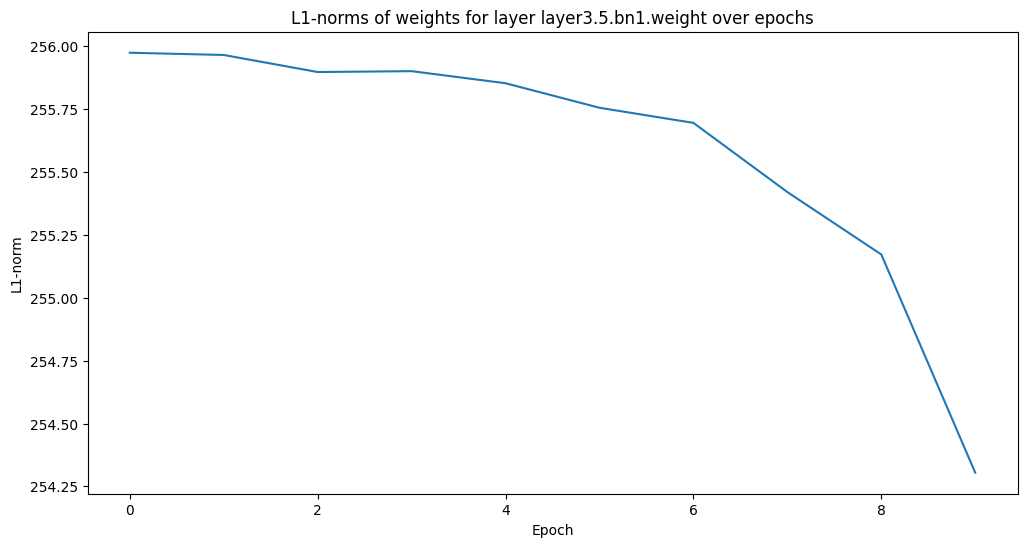

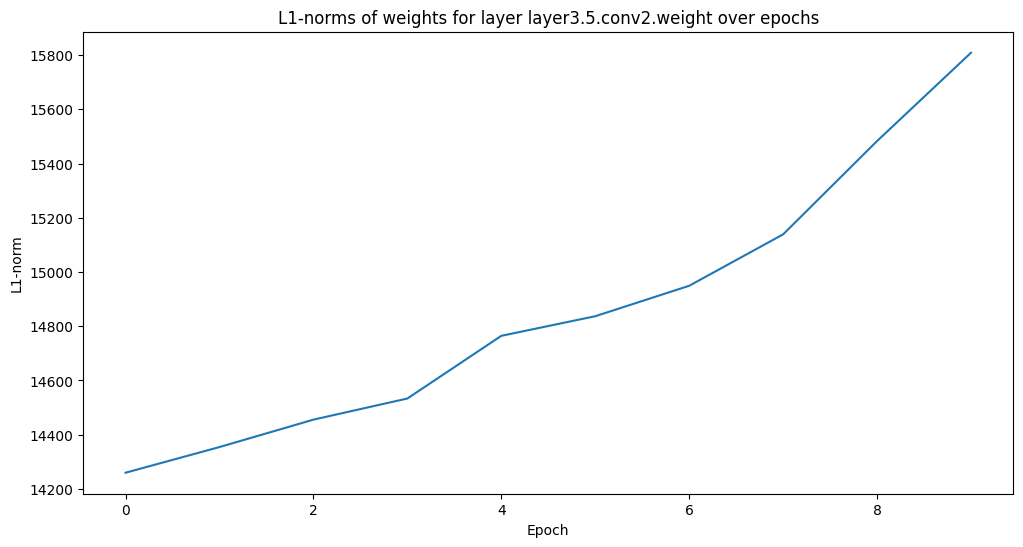

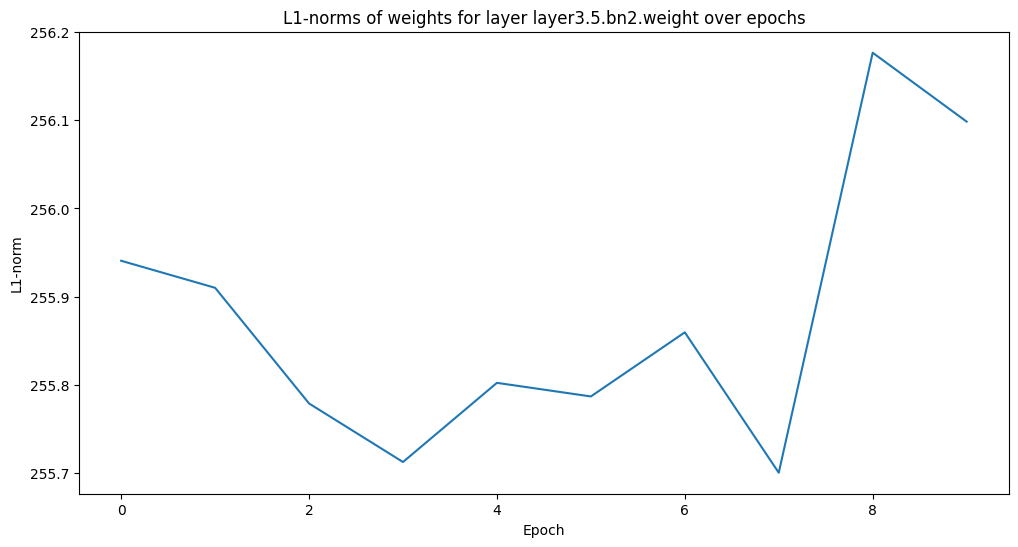

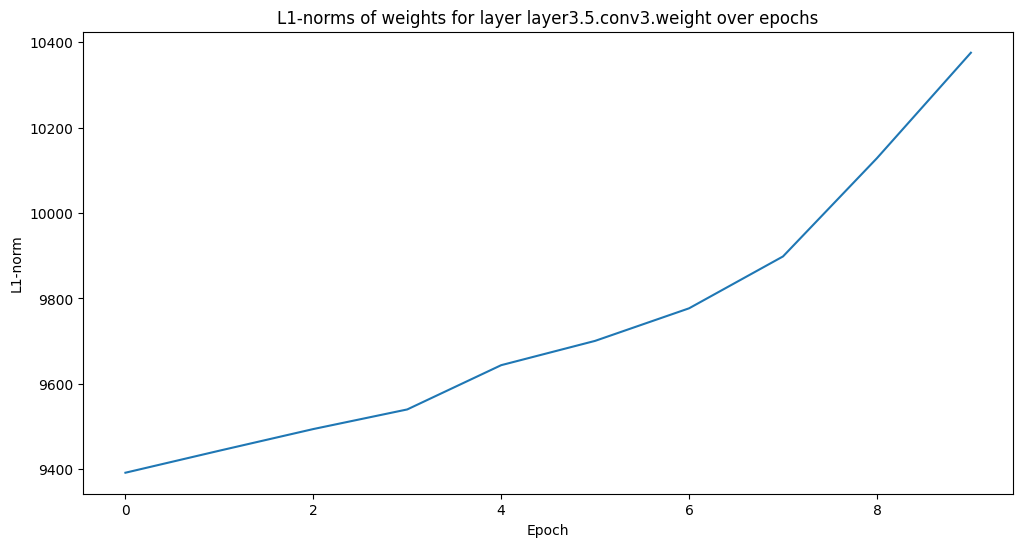

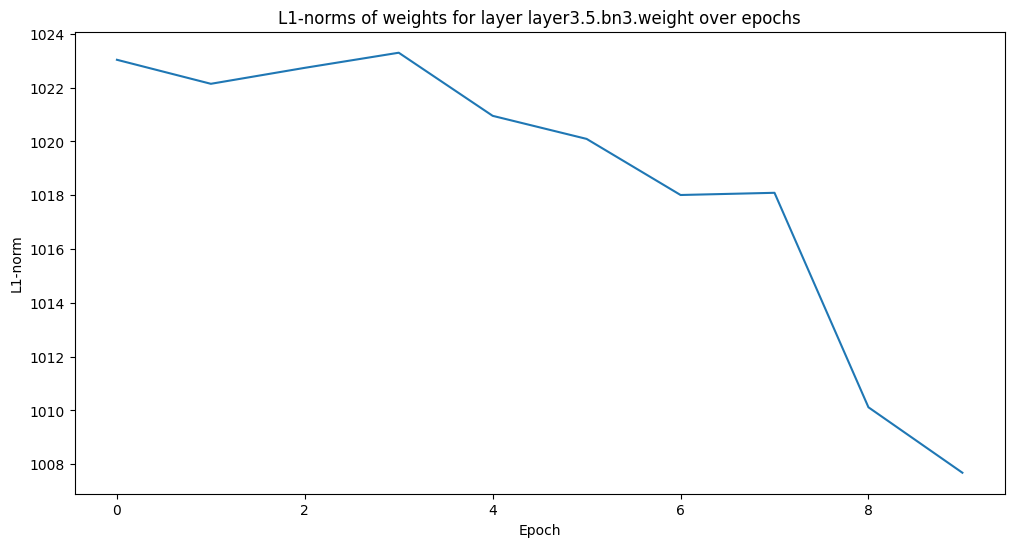

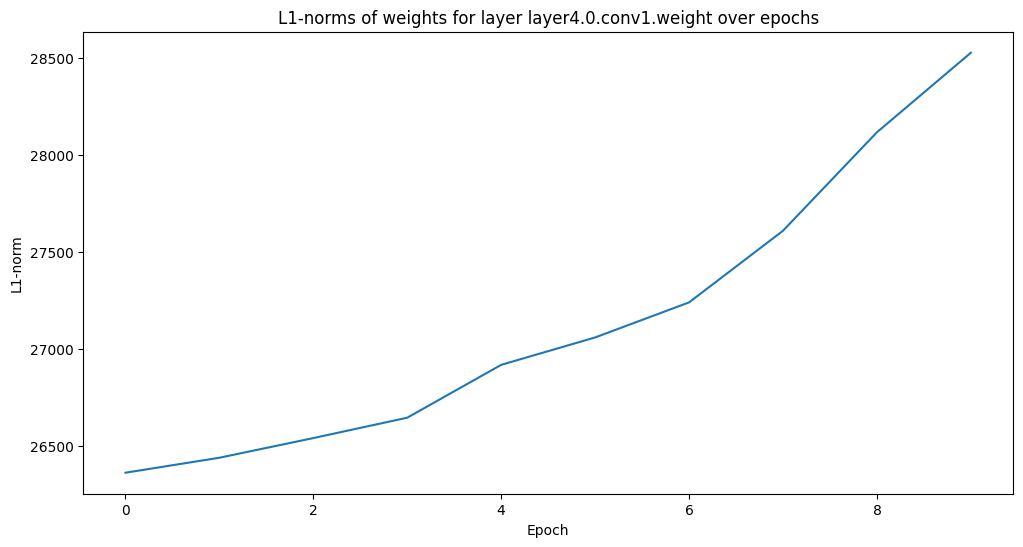

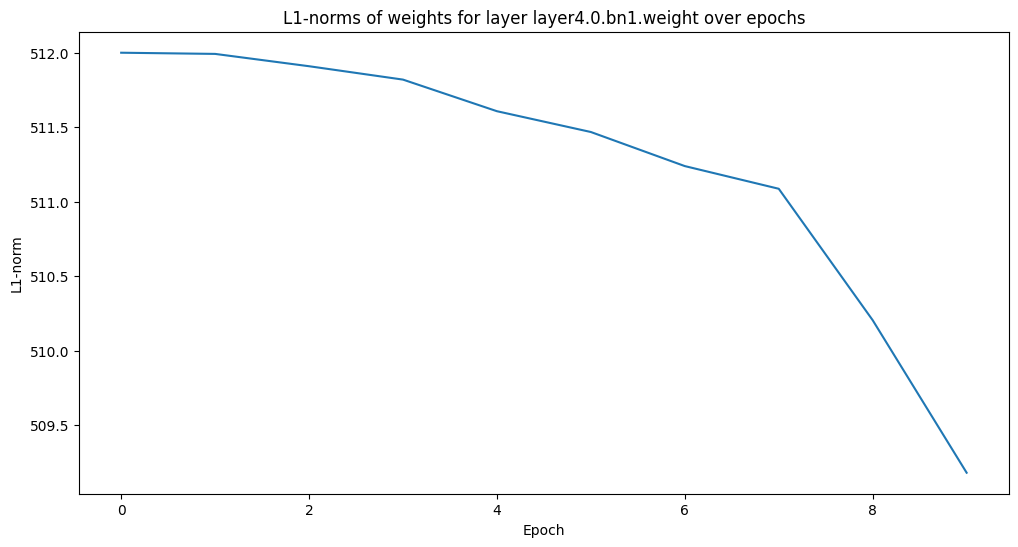

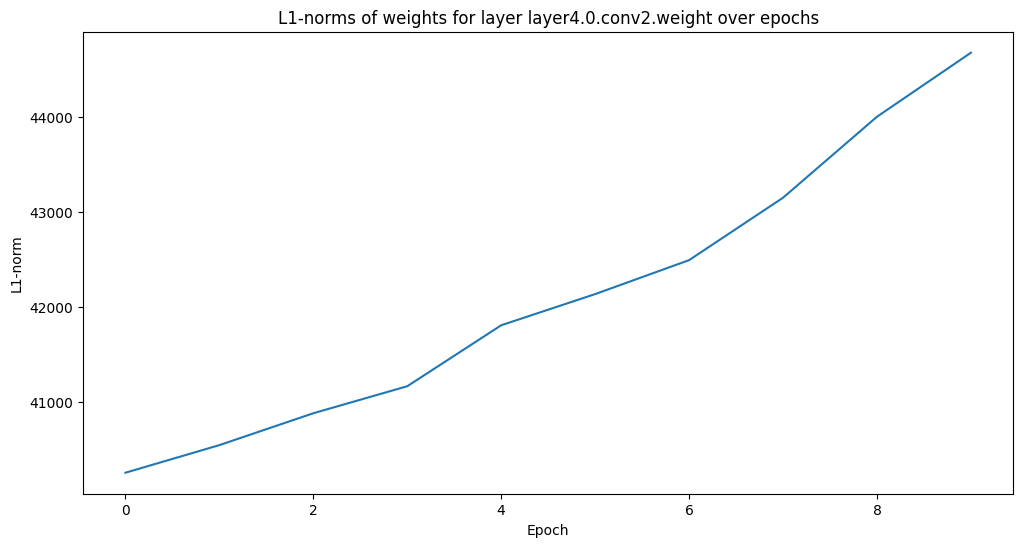

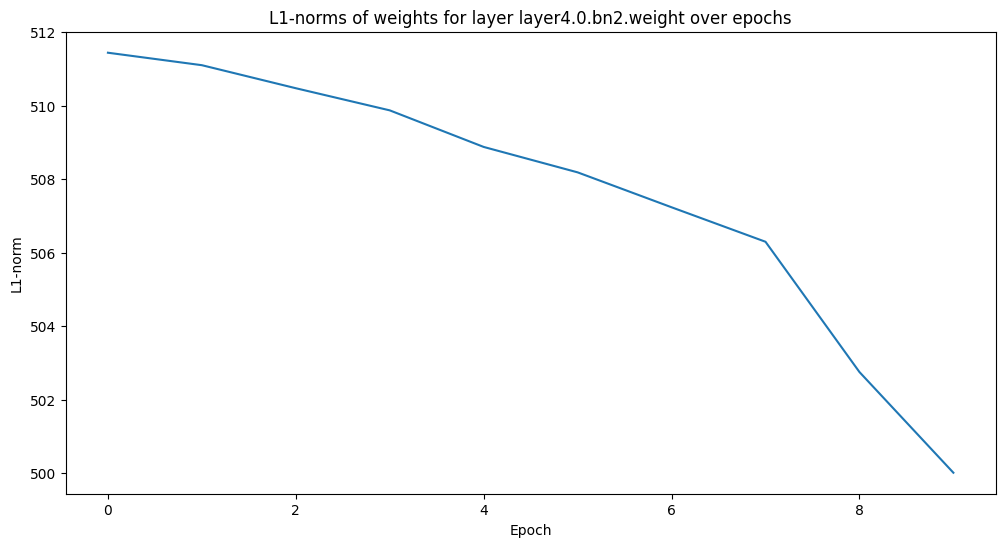

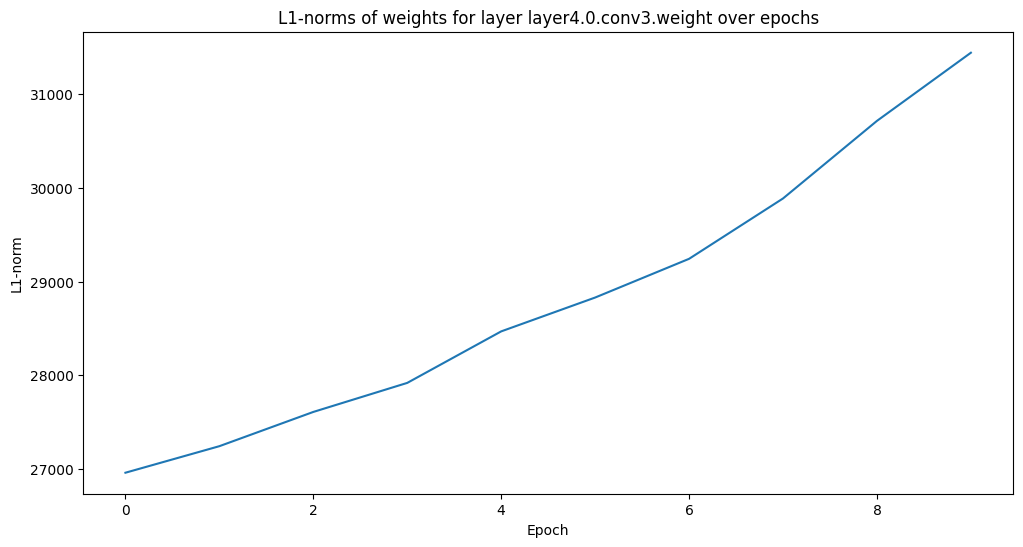

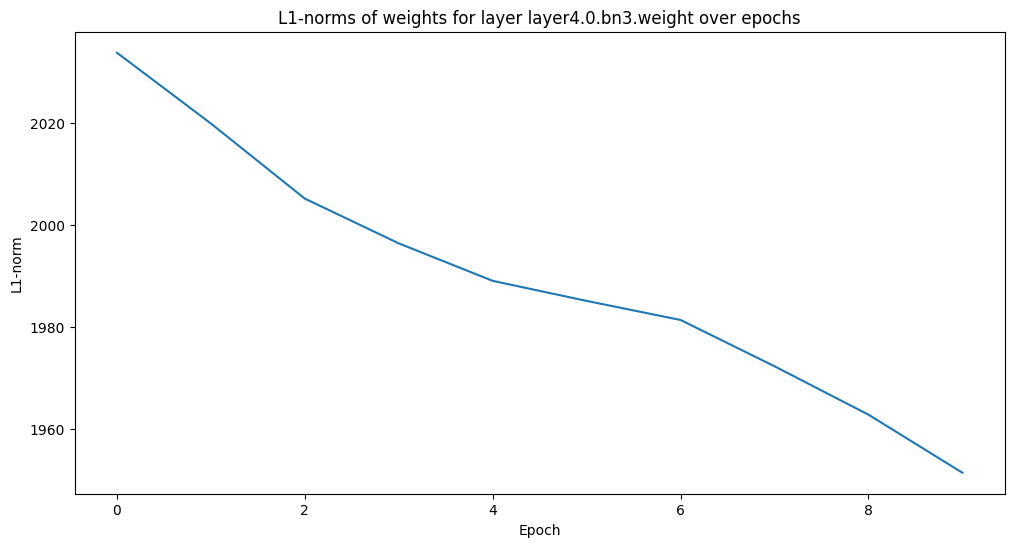

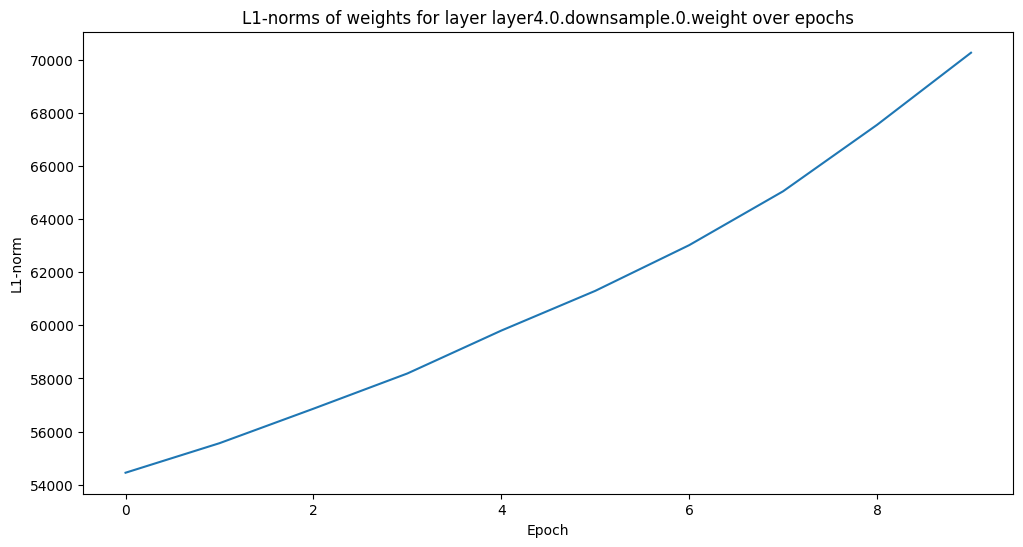

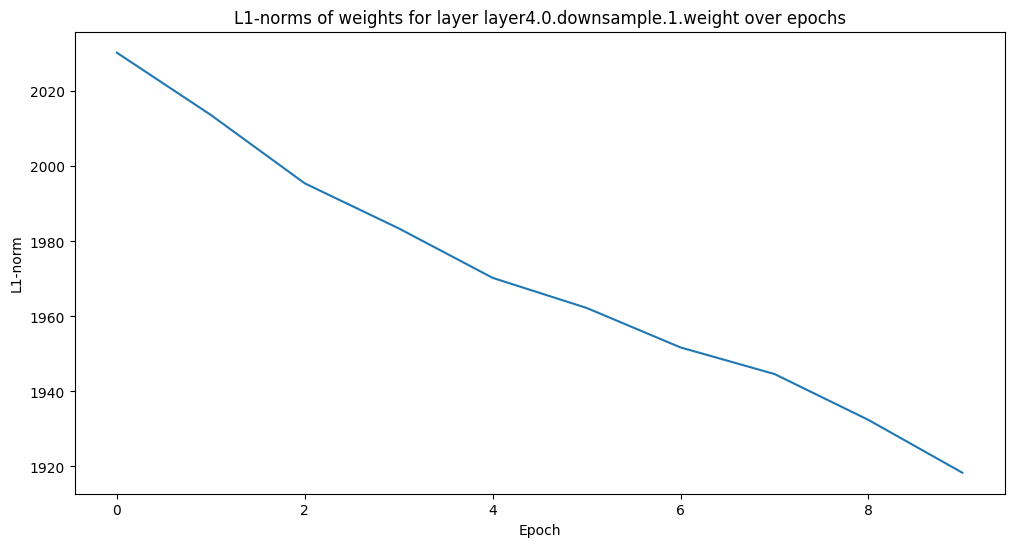

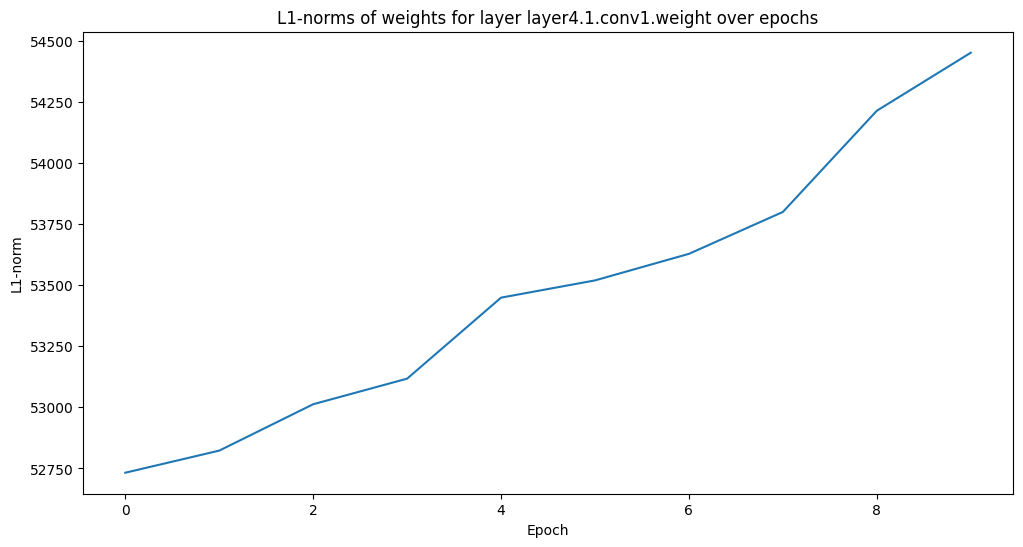

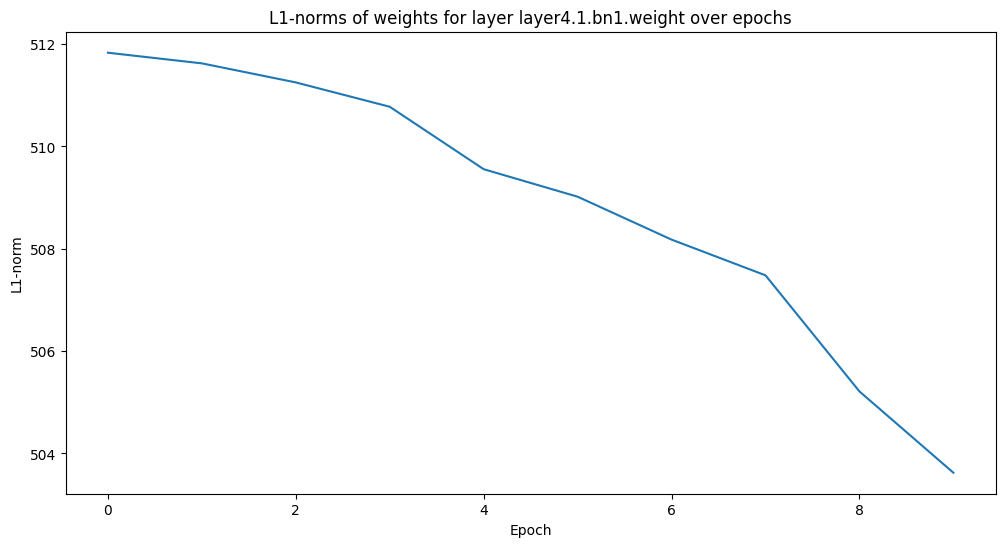

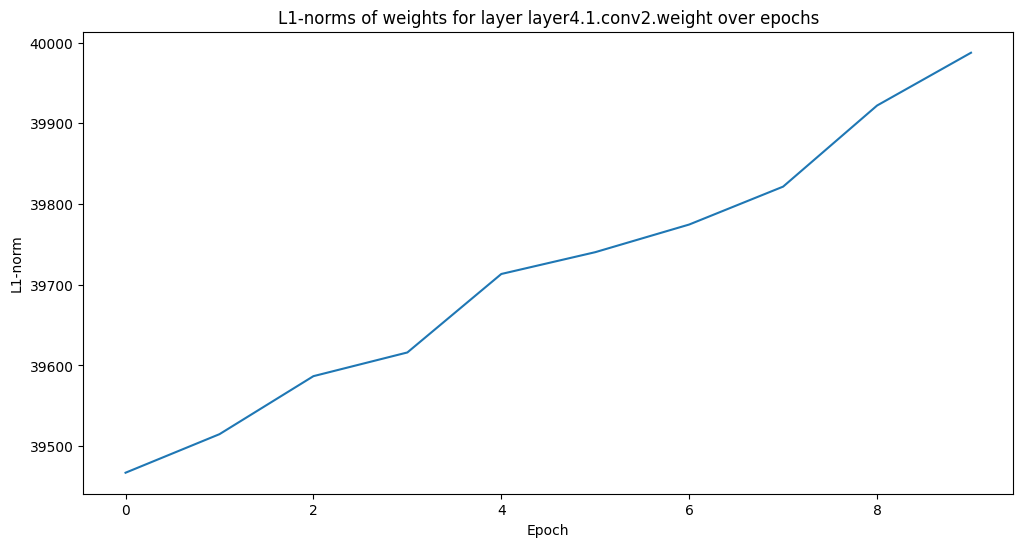

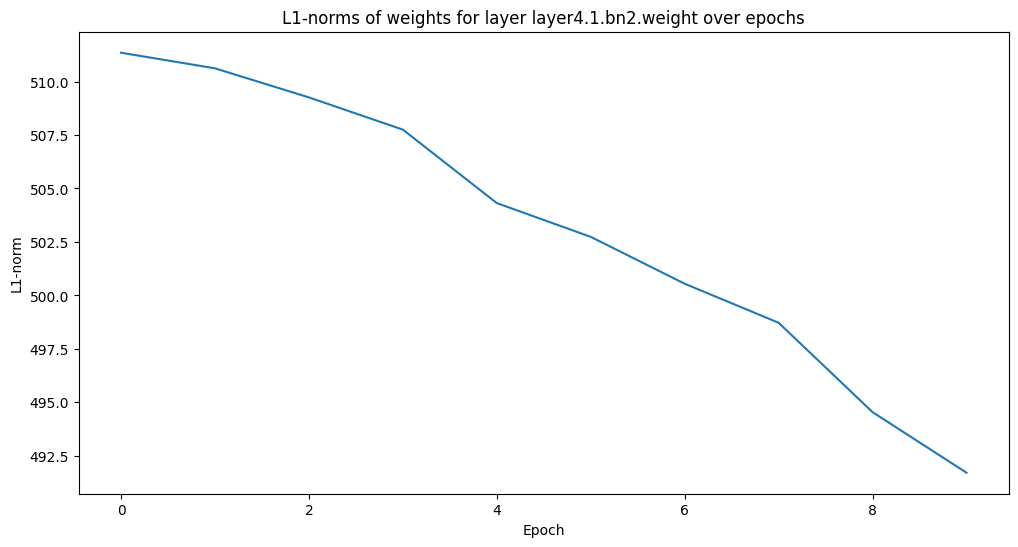

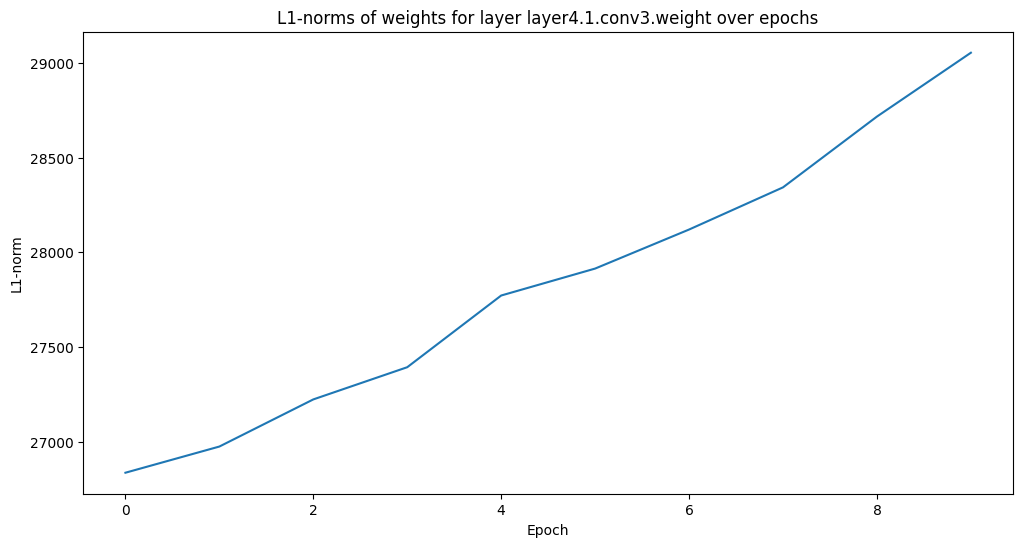

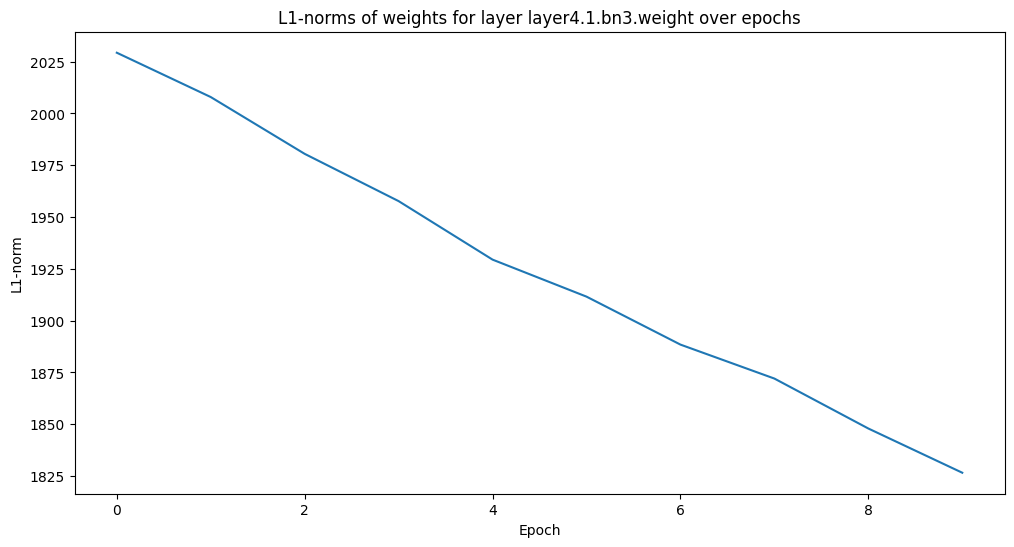

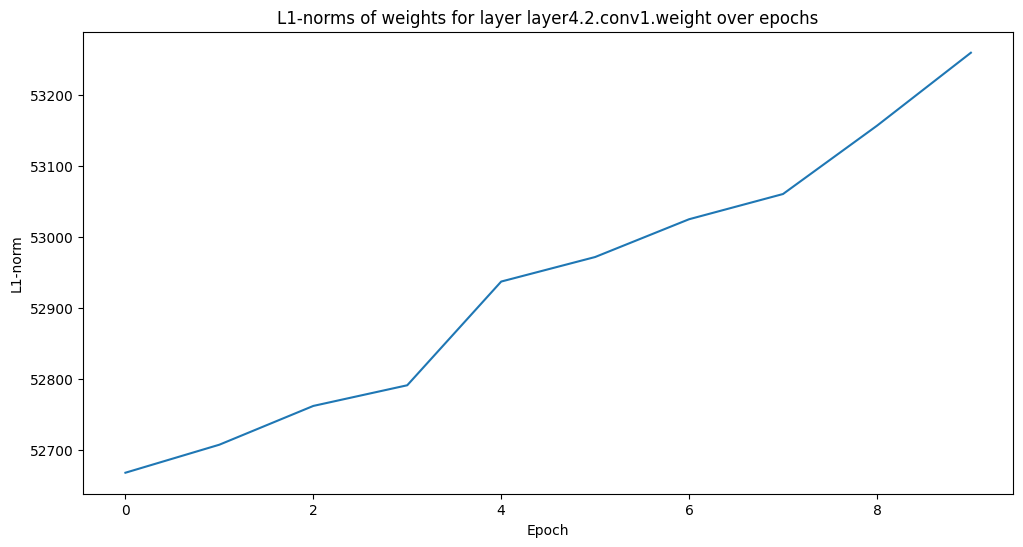

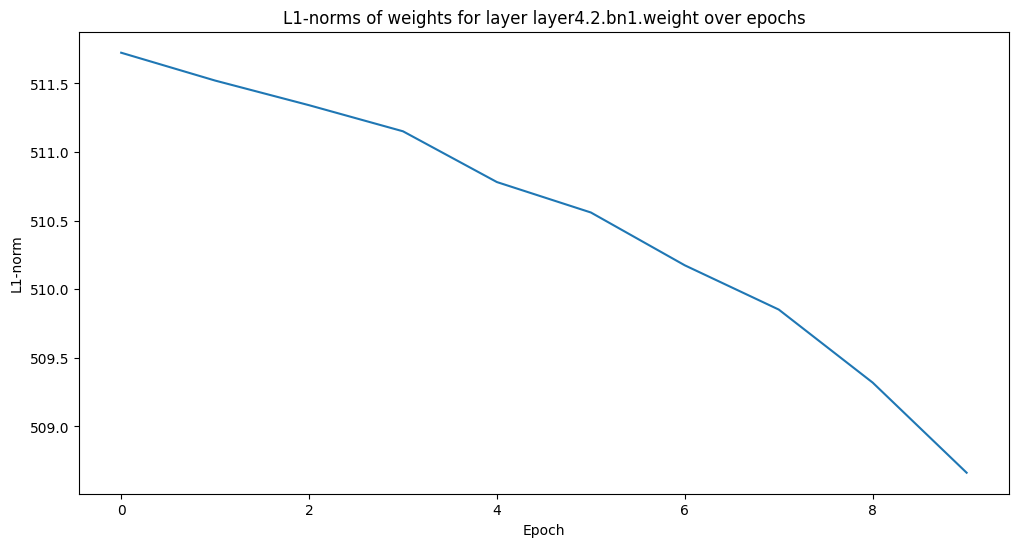

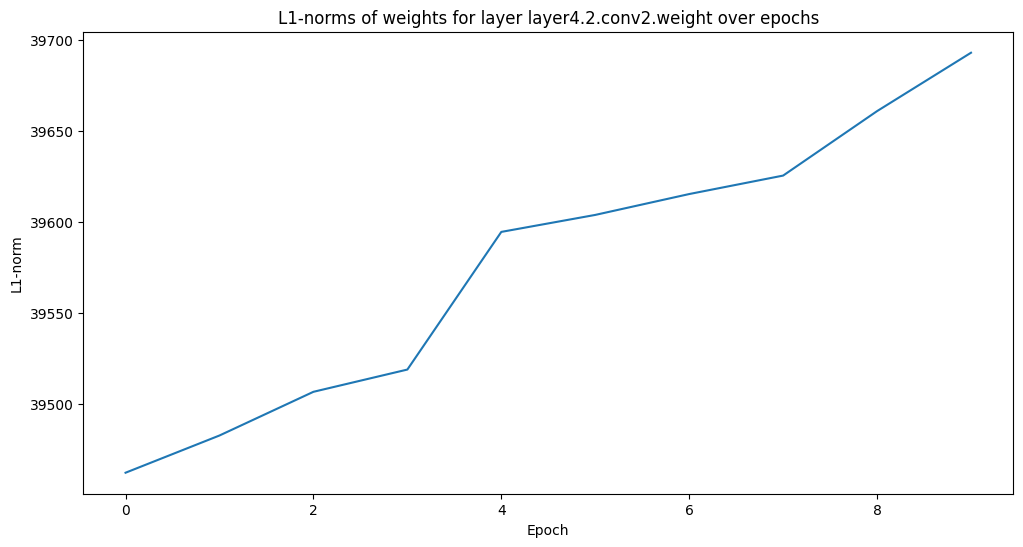

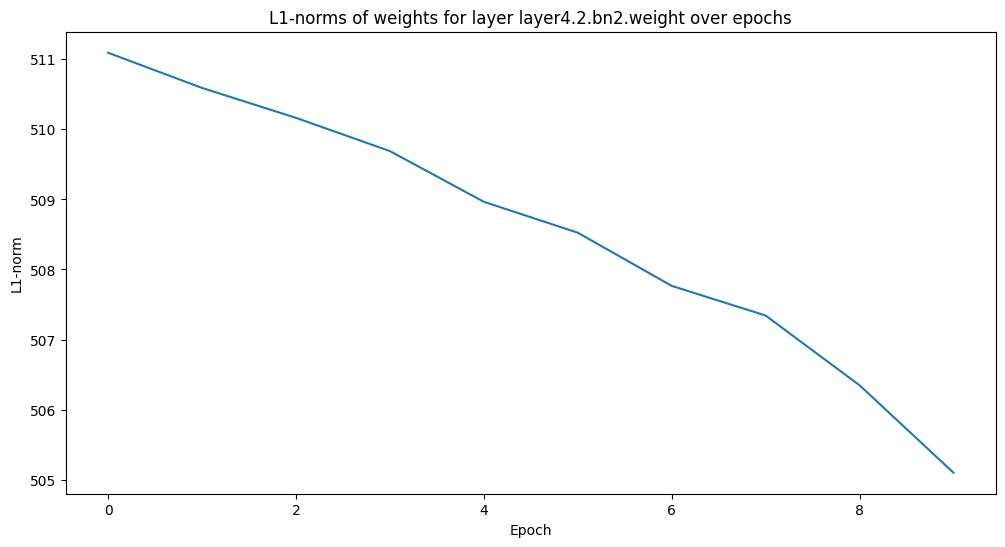

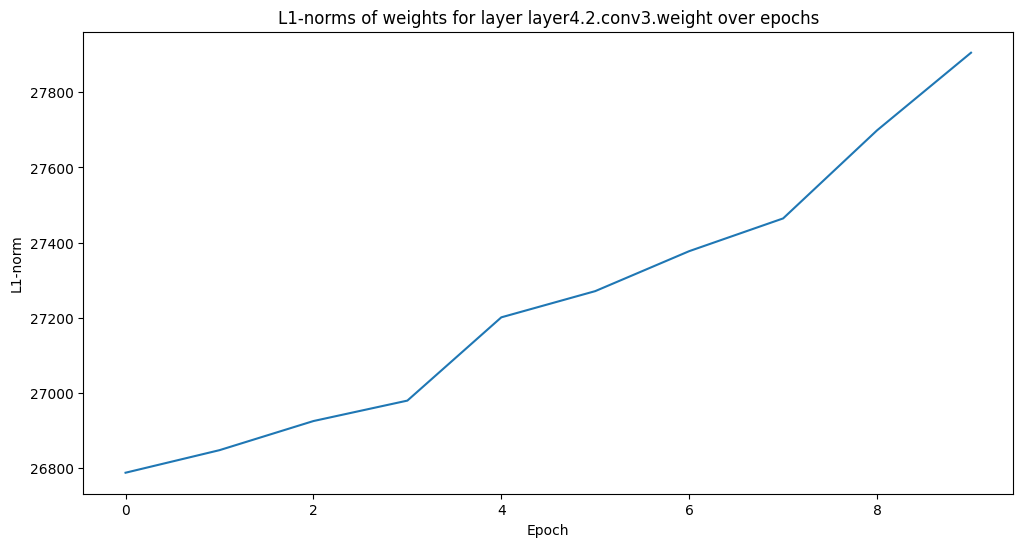

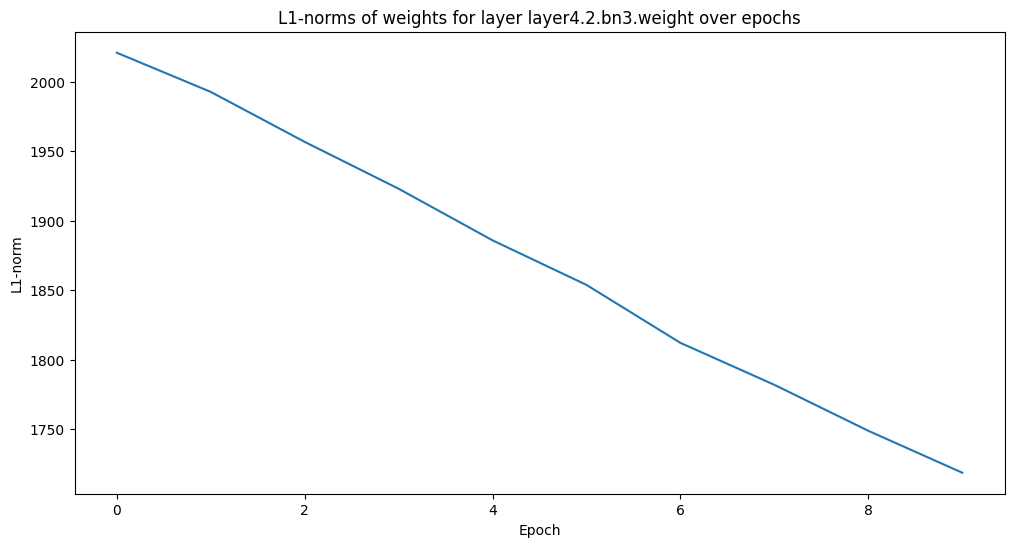

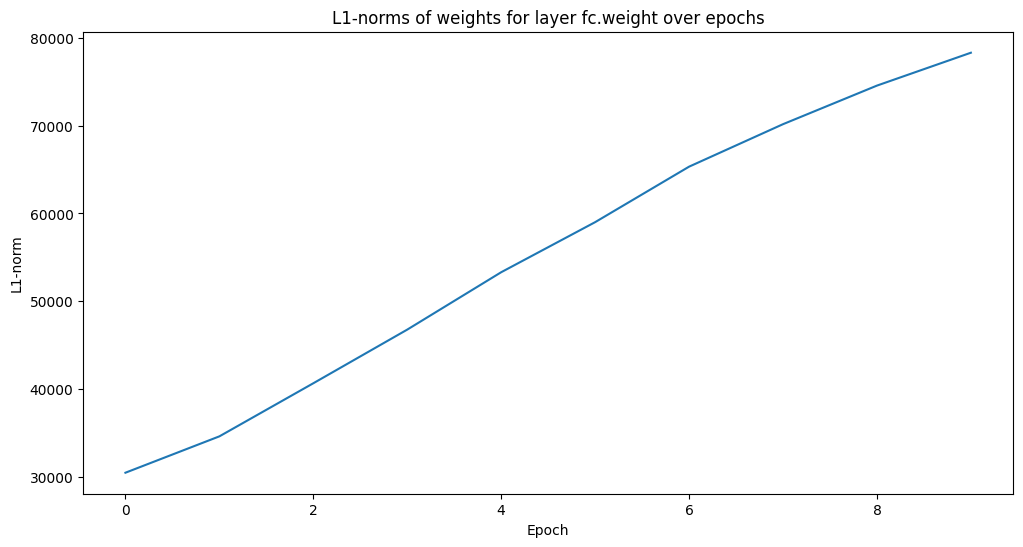

In [ ]:

# After training, plot the l1-norms for each layer
for layer_name in l1_norms_history[0].keys():
    plt.figure(figsize=(12, 6))
    plt.plot([l1_norms_history[epoch][layer_name] for epoch in range(num_epochs)])
    plt.title(f'L1-norms of weights for layer {layer_name} over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('L1-norm')
    plt.show()


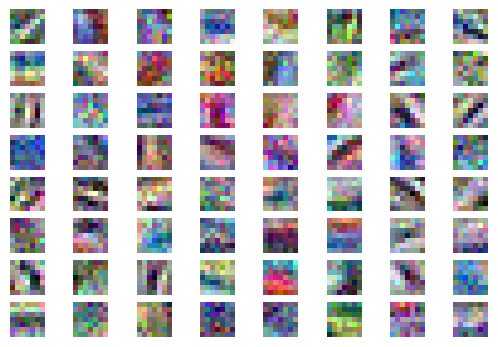

In [ ]:
weights1 = model.conv1.weight.data.cpu().numpy()

# Get the number of filters
num_filters = weights1.shape[0]

# For each filter
for i in range(num_filters):
    # Get the filter weights
    filter_weights = weights1[i, :, :, :]

    # Normalize the filter weights to lie in the range (0,1) for visualization
    filter_weights = (filter_weights - np.min(filter_weights)) / (np.max(filter_weights) - np.min(filter_weights))

    # Plot the filter weights
    plt.subplot(num_filters//8 + 1, 8, i+1)
    plt.imshow(np.transpose(filter_weights, (1, 2, 0)))
    plt.axis('off')

plt.show()

-**FINAL VERSION**


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np

# Define ResNet56 architecture
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

# Load pre-trained ResNet56 model
resnet56 = ResNet(BasicBlock, [9, 9, 9])

# Define cosine similarity function
def cosine_similarity(a, b):
    dot_product = torch.sum(a * b)
    norm_a = torch.norm(a, p=2)
    norm_b = torch.norm(b, p=2)
    cosine_sim = dot_product / (norm_a * norm_b)
    return cosine_sim.item()

# Compute cosine similarity for filters in each layer
cosine_similarities = []
for name, module in resnet56.named_modules():
    if isinstance(module, nn.Conv2d):
        filters = module.weight.data.view(module.weight.size(0), -1)
        num_filters = filters.size(0)
        similarity_matrix = np.zeros((num_filters, num_filters))
        for i in range(num_filters):
            for j in range(num_filters):
                similarity_matrix[i, j] = cosine_similarity(filters[i], filters[j])
        cosine_similarities.append((name, similarity_matrix))

# Print cosine similarities for each layer
for name, similarity_matrix in cosine_similarities:
    print(f"Layer: {name}")
    print(similarity_matrix)


Layer: conv1
[[ 1.00000000e+00 -2.28444338e-01  6.60062060e-02 -2.32734248e-01
   4.28115100e-01  2.77621180e-01 -5.11959344e-02  1.18912254e-02
  -3.26981723e-01 -1.18872993e-01  1.33884639e-01  2.84056008e-01
  -1.92030109e-02 -1.78351626e-01 -5.34170829e-02 -2.38601491e-03]
 [-2.28444338e-01  1.00000012e+00 -2.48582587e-01 -4.04673874e-01
   2.05334559e-01  3.85353789e-02 -3.61544669e-01  2.66966254e-01
  -1.66814446e-01 -1.81467041e-01  2.42355675e-01 -6.58964217e-02
  -1.34820476e-01  3.68974954e-01 -1.33617654e-01 -6.81599900e-02]
 [ 6.60062060e-02 -2.48582587e-01  1.00000000e+00  1.15519106e-01
  -7.79926330e-02  2.38629818e-01  9.86015201e-02 -2.34458983e-01
   8.43567774e-02  1.47443995e-01 -2.68272668e-01  1.55709445e-01
  -1.31383717e-01 -4.70480710e-01  6.39239699e-02  5.93030564e-02]
 [-2.32734248e-01 -4.04673874e-01  1.15519106e-01  1.00000000e+00
  -4.04928654e-01 -2.29481339e-01  5.89038312e-01 -3.56638245e-02
   2.91844487e-01  1.42389819e-01 -2.21134737e-01 -1.7906738

In [ ]:
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from torchvision.models import resnet18

In [ ]:
# Load CIFAR-10 dataset (you can use other datasets as well)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = dsets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

# Load pre-trained ResNet56 model
resnet56 = resnet18

# Define optimizer and loss function
optimizer = optim.SGD(resnet56.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

# Define lists to store cosine similarities
cosine_similarities_over_epochs = {name: [] for name, _ in resnet56.named_modules() if isinstance(_, nn.Conv2d)}

# Training loop with cosine similarity computation
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = resnet56(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # Compute cosine similarity for filters in each layer at the end of each epoch
    for name, module in resnet56.named_modules():
        if isinstance(module, nn.Conv2d):
            filters = module.weight.data.view(module.weight.size(0), -1)
            num_filters = filters.size(0)
            similarity_matrix = torch.zeros((num_filters, num_filters))
            for i in range(num_filters):
                for j in range(num_filters):
                    similarity_matrix[i, j] = cosine_similarity(filters[i], filters[j])
            cosine_similarities_over_epochs[name].append(similarity_matrix)

# Plot cosine similarity for each layer over all epochs
for name, similarities_list in cosine_similarities_over_epochs.items():
    num_epochs = len(similarities_list)
    plt.figure()
    plt.title(f'Cosine Similarity - Layer: {name}')
    plt.xlabel('Epochs')
    plt.ylabel('Cosine Similarity')
    for i in range(num_epochs):
        similarities = similarities_list[i]
        mean_similarity = similarities.mean().item()
        plt.plot(i + 1, mean_similarity, marker='o', color='b')
    plt.grid(True)
    plt.show()

NameError: name 'transforms' is not defined